# TASK OVERVIEW

The task at hand involves constructing a predictive model that leverages various features associated with
a customer’s initial order. The objective is to determine whether a €5.00 voucher should be issued to a
specific customer. The model should be designed to predict if a customer will place a follow-up purchase
within a 90-day period following their initial purchase. This information is represented by the target90
variable in the dataset. Each customer who is predicted to not place a subsequent order will be send a
voucher.




Empirical analyses by the media retailer have shown that for 25% of the churning customers, the voucher
triggers a purchase with an average order value of €10. So if a voucher is sent to a customer who would
not actually have bought again, revenue increases by an average of €1.25. Conversely, sending a voucher
to a customer who would have placed an order anyway results in a revenue loss equivalent to the voucher
value of €5. For customers who don’t receive a voucher, there is no impact on revenues.






The model’s performance is evaluated based on the expected revenue across all customers in a given
dataset. This is computed by considering the model’s predictions in conjunction with the associated costs
and revenues. It’s crucial to note that the model’s effectiveness is directly tied to its ability to maximize
this expected revenue. Hence, the model should be optimized with this specific goal in mind.
The dataset for training is provided in the train.csv file. Detailed descriptions of the features can be
found in the data_dictionary.pdf file.

In [2]:
# Set and check the current dictionary
# Import necessary libraries
import os

current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: c:\Users\inven\OneDrive\Escritorio\Python_datos\Git_folder\Ml-application-project-


# EDA 


## 1.Loading the data into the data frame.

In [3]:
# Import necessary libraries
import pandas as pd

df = pd.read_csv('./data/train.csv',sep=';')
df.head(5)

C:\Users\inven\AppData\Local\Temp\ipykernel_51316\664528409.py:4: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/train.csv',sep=';')


,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
0,41191,2008-12-01,0,0,9,2008-12-01,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,38860,2008-12-16,1,0,4,2008-12-16,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,61917,2008-08-19,0,0,12,2008-08-19,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40647,2008-06-16,1,0,8,2008-06-16,0,1,0,0,...,0,0,0,2,0,0,0,0,0,0
4,1347,2008-08-08,0,0,1,2008-08-08,0,1,1,1,...,2,0,0,0,0,0,0,0,0,0


In [4]:
df.tail(5)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
32423,7784,2008-10-21,1,0,8,2008-10-21,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
32424,41695,2008-11-09,1,0,4,2008-11-09,0,1,3,0,...,0,0,0,1,0,0,0,0,0,1
32425,7612,2008-04-12,2,0,9,2008-04-12,0,3,0,0,...,0,0,0,0,0,0,0,0,0,0
32426,31941,2008-11-15,0,0,12,2008-11-15,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
32427,58849,2008-07-28,1,0,5,2008-07-28,0,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(32428, 38)

The data frame where we are going to train the model on, has in total 32.428 customers with 37 variables, and the objective target90.

## 2. Checking the types of data

In [6]:
# Import necessary librarys
import pandas as pd

# We created a function to show the variable and type
def reshape_columns_by_dtype(df):
    columns_list = []
    for dtype, columns in df.dtypes.groupby(df.dtypes).groups.items():
        for column in columns:
            columns_list.append((str(dtype), column))
    reshaped_df = pd.DataFrame(columns_list, columns=['Data Type', 'Variable'])
    
    return reshaped_df

reshape_columns_by_dtype(df)

,Data Type,Variable
0,int64,customernumber
1,int64,salutation
2,int64,title
3,int64,domain
4,int64,newsletter
5,int64,model
6,int64,paymenttype
7,int64,deliverytype
8,int64,invoicepostcode
9,int64,voucher


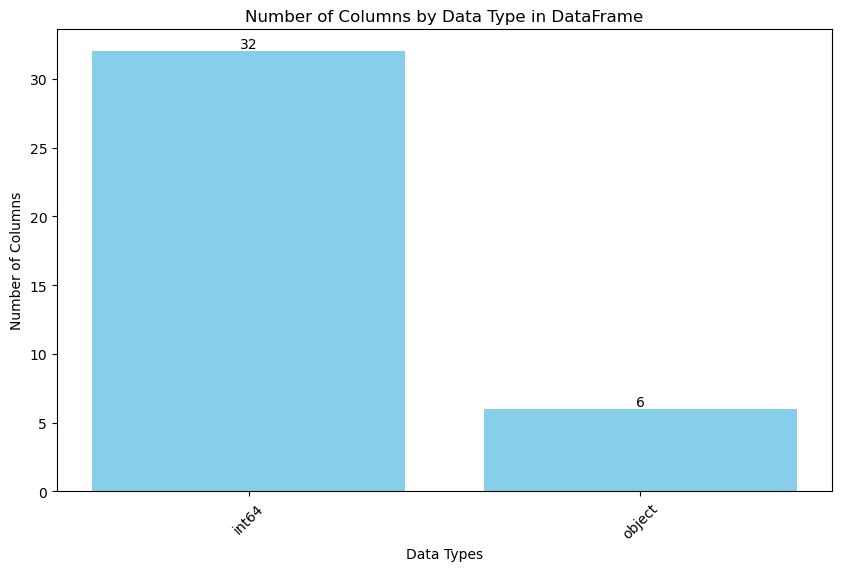

In [7]:

# Import necessary librarys
import matplotlib.pyplot as plt

# Plot number of variable type
def plot_columns_by_dtype(df):
    dtype_groups = df.columns.to_series().groupby(df.dtypes).groups
    
    dtype_counts = {str(k): len(v) for k, v in dtype_groups.items()}
    
    plt.figure(figsize=(10, 6))
    bars = plt.bar(dtype_counts.keys(), dtype_counts.values(), color='skyblue')
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=10)
    
    plt.xlabel('Data Types')
    plt.ylabel('Number of Columns')
    plt.title('Number of Columns by Data Type in DataFrame')
    plt.xticks(rotation=45)
    plt.show()

plot_columns_by_dtype(df)

The data frame consists of 32 variables in numerical and 6 in object time.

We will first check whether the object is correctly imported into the database and what kind of transformation or drop it needs.
Example a categorical variable like `satisfaction`  with values "Good","Bad","Mediocre" should be converted with package onehot-encoder into numbers.

In [8]:

df.columns[df.dtypes == object]


Index(['date', 'datecreated', 'delivpostcode', 'advertisingdatacode',
       'deliverydatepromised', 'deliverydatereal'],
      dtype='object')

Looking at it, it makes sense that these are objects. Also, the dictionary of the data shows us that we well use the OneNote encoder in the following variables:
`salutation`,`title`, `domain`,`newsletter`,`model`, `paymenttype` `deliverytype` `voucher` `case` `gift`, `entry`, `points`,`shippingcosts` 
in our df are numerical which means that the numbers are not linear but categorical.

## 3. Dividing train and test data for EDA 

We avoid data leakage by dividing the test by train. Data leakage occurs when information from outside the training dataset is used to create a machine-learning model, leading to overly optimistic performance estimates.

Train-Test Contamination: When information from the test set leaks into the training set, often due to improper data splitting or feature engineering performed on the full dataset before splitting.

 **Note: To prevent data leakage, it is crucial to conduct exploratory data analysis (EDA) only on the training set after splitting the data. This ensures that any modifications and decisions are based solely on information the model should know, maintaining the integrity of the test set as truly unseen data.**


In [9]:
# Import necessary packages
import numpy as np
from sklearn.model_selection import train_test_split

Train,Test = train_test_split(df, test_size=0.20, random_state=1842,shuffle= True)

In [10]:
Train.shape

(25942, 38)

In [11]:
Test.shape

(6486, 38)

## 3.1 Distribution on target variable

In [12]:
Train.target90.value_counts(normalize=True) * 100

target90
0    81.20808
1    18.79192
Name: proportion, dtype: float64

81% of customers don't buy again, and 19% buy again.
A Unbalanced data set.

In [13]:
Train.head(3)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
9783,35118,2008-07-29,1,0,0,2008-07-29,1,1,2,0,...,0,0,0,0,0,0,0,2,0,0
14874,65816,2008-05-16,0,0,9,2008-05-16,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
19293,55818,2008-12-14,0,0,4,2008-12-14,0,1,3,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
Train.isna().sum()[Train.isna().sum() > 0].sort_values(ascending=False)


delivpostcode          24831
advertisingdatacode    20711
dtype: int64

In [15]:
Test.target90.value_counts(normalize=True)* 100

target90
0    81.86864
1    18.13136
Name: proportion, dtype: float64

In [16]:
Test.head(3)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
19936,37269,2008-07-03,0,0,4,2008-07-03,0,1,2,0,...,0,0,0,0,0,0,0,1,0,1
2286,59202,2008-08-26,0,0,4,2008-06-22,1,3,1,1,...,0,0,0,0,0,0,0,0,0,0
20906,33002,2008-11-23,1,0,2,2008-11-23,0,1,3,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
Test.isna().sum()[Train.isna().sum() > 0].sort_values(ascending=False)

delivpostcode          6205
advertisingdatacode    5194
dtype: int64

After revising missing values and distribution of the target variable, around 80% of the customers didn't buy back. There is a clear imbalance of the data 
that we resolve by utilization of oversampling. In addition, there are only two variables with missing data: the code of advertising and delivery postcode.
Since these are specific data, we decided not to use any imputations and will be dropping those variables.

## 4. Analysis of the variables

### 4.1 General EDA

#### With package `ydata_profiling`, we find out if there are any problems with the features we want to use for our models.

In [18]:
# Import necessary packages
from ydata_profiling import ProfileReport

profile = ProfileReport(Train, title="Profiling Target Report")


In [19]:
#profile

In [20]:
Train.describe().T

,count,mean,std,min,25%,50%,75%,max
customernumber,25942.0,33393.809999,19147.688809,1.0,16844.75,33566.5,50057.75,66251.0
salutation,25942.0,0.541477,0.657922,0.0,0.00,0.0,1.00,2.0
title,25942.0,0.006784,0.082089,0.0,0.00,0.0,0.00,1.0
domain,25942.0,7.531532,3.676994,0.0,4.00,9.0,11.00,12.0
newsletter,25942.0,0.171112,0.376614,0.0,0.00,0.0,0.00,1.0
model,25942.0,1.650721,0.827288,1.0,1.00,1.0,2.00,3.0
paymenttype,25942.0,1.002120,1.091950,0.0,0.00,1.0,2.00,3.0
deliverytype,25942.0,0.204687,0.403481,0.0,0.00,0.0,0.00,1.0
invoicepostcode,25942.0,48.748015,24.317088,0.0,30.00,47.0,66.00,99.0
voucher,25942.0,0.162247,0.368684,0.0,0.00,0.0,0.00,1.0


With the help of the tool, we  analyze the following:
- There 25.942 unique clients for t; no clients are doing multiple buys in this period, or at least for our test data
- `Gifts,` `Title`, and `w8` are highly imbalanced, with 90-98% of the data belonging to the same class 
- `delivpostcode`has 95.7%, `advertisingdatacode` has 79.8% missing values respectively
- `Points` variable is useless with 100% of values being 0 
- There are around 10 variables with high correlation with other variables; the correlations are very intuitive, such as the number of items correlating with weight or delivery type correlating with payment type. These relationships may not add significant value.


### 4.2 Mising values

<Axes: >

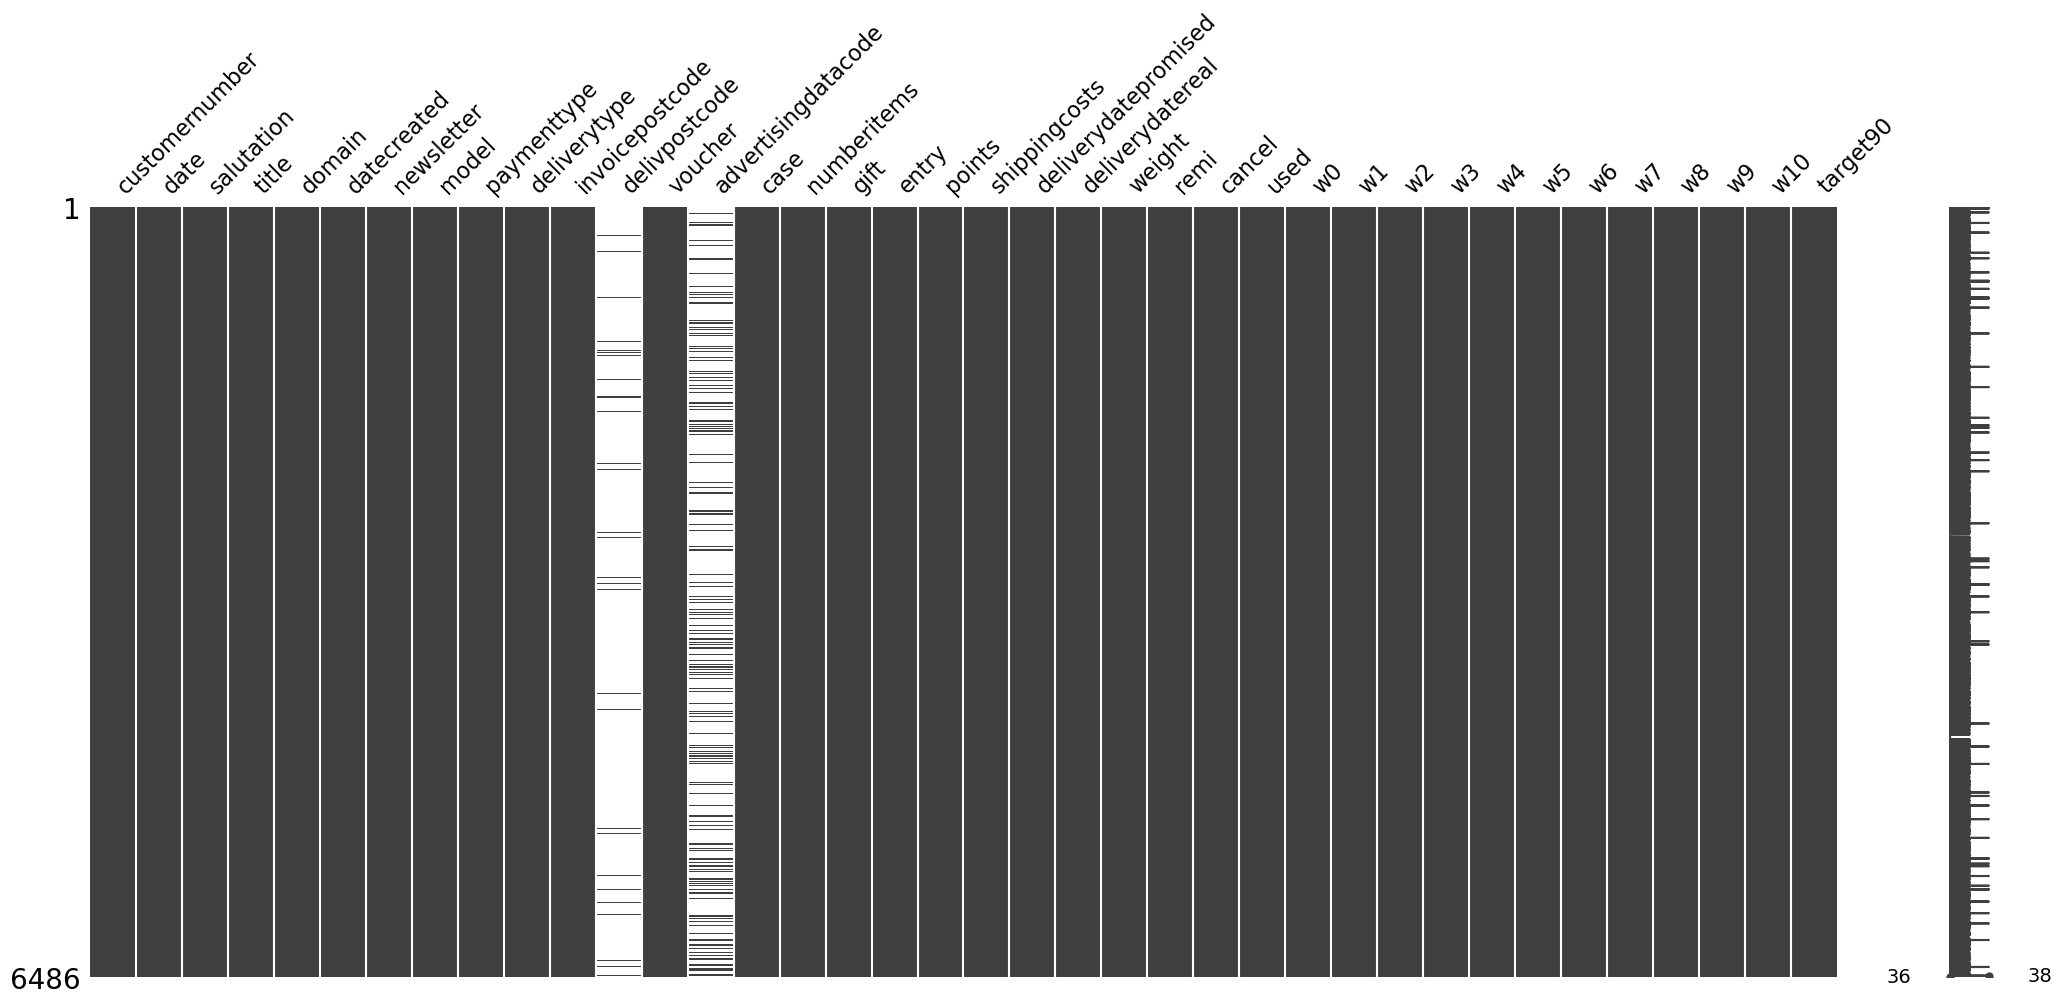

In [21]:
# Import necessary libraries
import missingno as msno

msno.matrix(Test)

We drop `delivpostcode` and `advertisingdatacode` because these two variables have a lot of missing data.
Now we will use the one hot encoder package to change the variables that are categorical.

### 4.3 Features enconding by onehote encoder

First we delete the variables that we do not need.

In [22]:
Train_variables = Train.drop(columns=["delivpostcode","advertisingdatacode","points"]) 

In [23]:
# Check that the variables are actually deleted
Train_variables.head(2)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
9783,35118,2008-07-29,1,0,0,2008-07-29,1,1,2,0,...,0,0,0,0,0,0,0,2,0,0
14874,65816,2008-05-16,0,0,9,2008-05-16,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Import necessary libraries
from sklearn.preprocessing import OneHotEncoder

# define the categorical variables and proceed with One hot encoder
categorical_mappings = {
    'salutation': {0: 'Ms.', 1: 'Mr.', 2: 'Company'},
    'title': {0: 'No', 1: 'Yes'},
    'domain': {
        0: 'aol.com', 1: 'arcor.de', 2: 'freenet.de', 3: 'gmail.com',
        4: 'gmx.de', 5: 'hotmail.de', 6: 'online.de', 7: 'onlinehome.de',
        8: 't-online.de', 9: 'web.de', 10: 'yahoo.com', 11: 'yahoo.de', 12: 'others'
    },
    'newsletter': {0: 'No', 1: 'Yes'},
    'model': {1: '1', 2: '2', 3: '3'},
    'paymenttype': {
        0: 'Payment_on_invoice', 1: 'Cash_payment',
        2: 'Transfer_from_current_account', 3: 'Transfer_from_credit_card'
    },
    'deliverytype': {0: 'Dispatch', 1: 'Collection'},
    'voucher': {0: 'No', 1: 'Yes'},
    'case': {1: 'Low', 5: 'High'},
    'gift': {0: 'No', 1: 'Yes'},
    'shippingcosts': {0: 'No', 1: 'Yes'}
}

columns_to_encode = list(categorical_mappings.keys())

ohe = (
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    .set_output(transform="pandas")
)


encoded_columns = ohe.fit_transform(Train_variables[columns_to_encode])

feature_names = ohe.get_feature_names_out(columns_to_encode)
renamed_columns = [
    f"{col}_{categorical_mappings[col].get(int(category.split('_')[1]), category)}"
    if col in categorical_mappings and category.split('_')[1].isdigit()
    else category
    for col, category in zip(feature_names, feature_names)
]

encoded_columns.columns = renamed_columns

non_encoded_columns = Train_variables.drop(columns=columns_to_encode)
Train_encoded = pd.concat([non_encoded_columns.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

# Print revised train colum
Train_encoded.head()

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,0000-00-00,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [25]:
Train_encoded.isna().sum()[Train_encoded.isna().sum() > 0].sort_values(ascending=False)

Series([], dtype: int64)

In [26]:
Train_encoded.shape

(25942, 64)

To ensure that the process was successful we inspect a customer.

In [27]:
Train_encoded[Train_encoded.customernumber == 35118]

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [28]:
Train_variables[Train_variables.customernumber ==  35118]

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w2,w3,w4,w5,w6,w7,w8,w9,w10,target90
9783,35118,2008-07-29,1,0,0,2008-07-29,1,1,2,0,...,0,0,0,0,0,0,0,2,0,0


Having the same customer in both data frames ensure that the proces was successful.

### 4.4 Correlation of variables and correlation between the target 

<Axes: title={'center': 'Feature-correlation (pearson)'}>

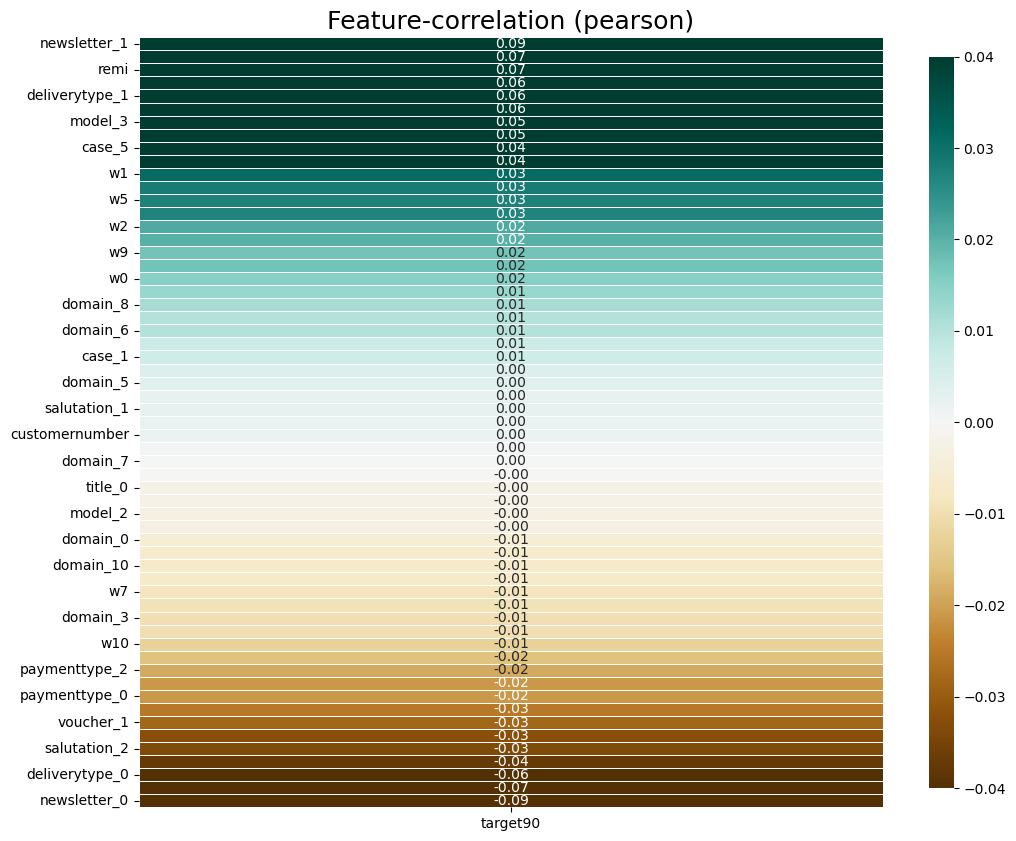

In [29]:
# Import necessary libraries
import klib

# Positive plot correlation
klib.corr_plot(Train_encoded,target='target90' ) 

In [30]:
numerical_v = Train_encoded.select_dtypes(include=['number'])

In [31]:
# Find correlations that are top 5 negative
correlations = numerical_v.corr()['target90'].sort_values()
correlations.head(5)

newsletter_0      -0.085371
shippingcosts_1   -0.068358
deliverytype_0    -0.062645
model_1           -0.037342
salutation_2      -0.033711
Name: target90, dtype: float64

In [32]:
# Find correlations that are top 5 positive
correlations.tail(5)

deliverytype_1     0.062645
remi               0.066223
shippingcosts_0    0.068358
newsletter_1       0.085371
target90           1.000000
Name: target90, dtype: float64

We do not see any strong correlations at >0.8, so we are going to analyse only the variables `newsletter`, `shiping_cost`, `model delivery`
and `number items`. 

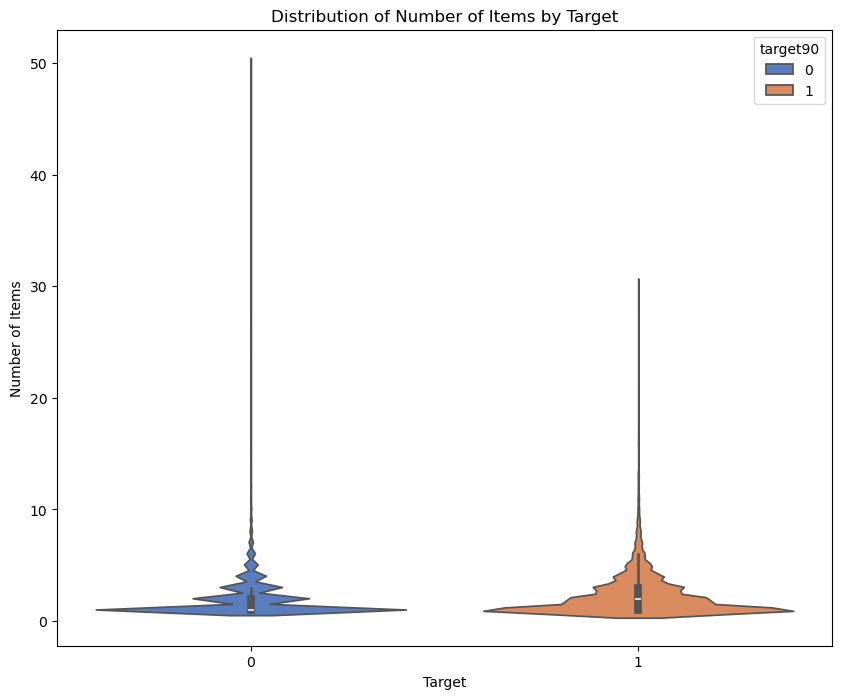

In [33]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# Violin plot
sns.violinplot(x='target90', y='numberitems', data=Train_encoded, palette="muted",hue="target90")

plt.xlabel('Target')
plt.ylabel('Number of Items')
plt.title('Distribution of Number of Items by Target')

# Show plot
plt.show()

This violin plot shows the distribution of the number of items for the two target groups (0 and 1). The distributions are heavily skewed, with most values concentrated near zero for both groups, but group 0 appears to have a slightly wider spread.

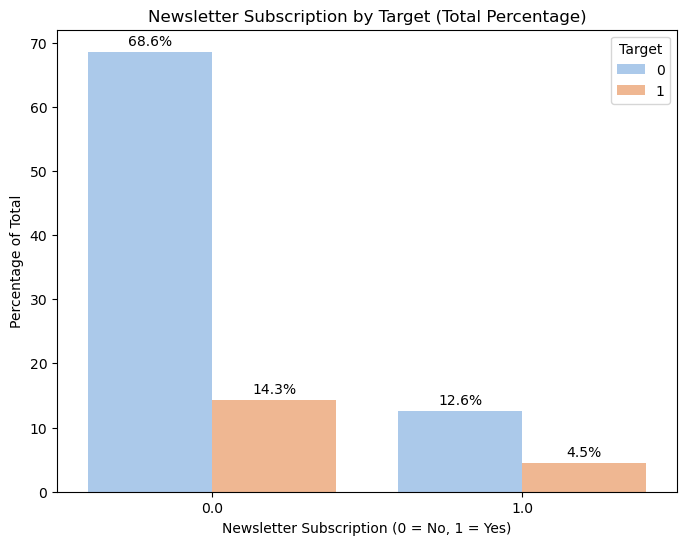

In [34]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentages based on the total dataset
grouped = Train_encoded.groupby(['newsletter_1', 'target90']).size().reset_index(name='count')
total_count = grouped['count'].sum()
grouped['percentage'] = grouped['count'] / total_count * 100

plt.figure(figsize=(8, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='newsletter_1', 
    y='percentage', 
    hue='target90', 
    data=grouped, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped.itertuples():
    plt.text(
        x=p.newsletter_1 - 0.2 + (0.4 * p.target90), 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Newsletter Subscription (0 = No, 1 = Yes)')
plt.ylabel('Percentage of Total')
plt.title('Newsletter Subscription by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()

Contrary, people who do not subscribe to the newsletter tend to buy again. Maybe the subscription goes to the spam or the customer feels it is intrusive, therefore having a negative impact on the company.

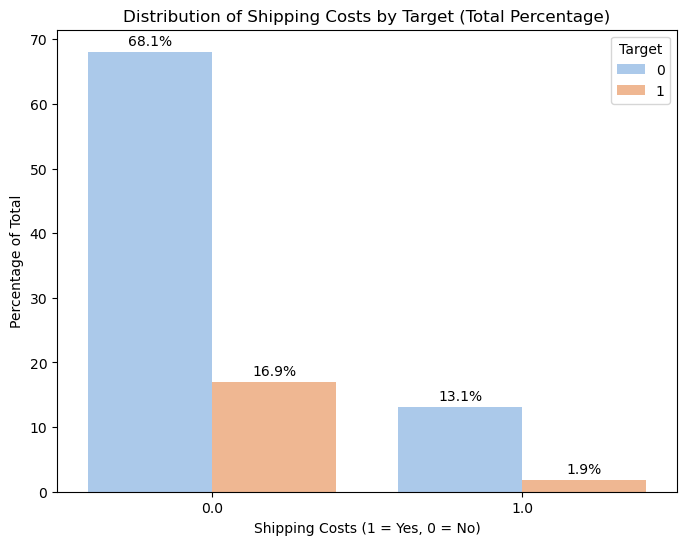

In [35]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentages based on the total dataset
grouped_shipping = Train_encoded.groupby(['shippingcosts_1', 'target90']).size().reset_index(name='count')
total_count = grouped_shipping['count'].sum()
grouped_shipping['percentage'] = grouped_shipping['count'] / total_count * 100

plt.figure(figsize=(8, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='shippingcosts_1', 
    y='percentage', 
    hue='target90', 
    data=grouped_shipping, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped_shipping.itertuples():
    plt.text(
        x=p.shippingcosts_1 - 0.2 + (0.4 * p.target90), 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Shipping Costs (1 = Yes, 0 = No)')
plt.ylabel('Percentage of Total')
plt.title('Distribution of Shipping Costs by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()

It makes sense that when there is an extra fee, fewer people than buy again, about 15% more when the fee is not charged. 

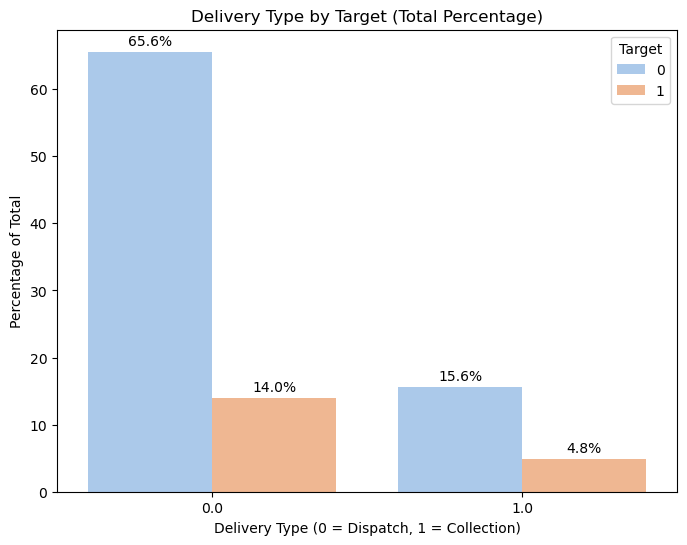

In [36]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate percentages based on the total dataset
grouped_delivery = Train_encoded.groupby(['deliverytype_1', 'target90']).size().reset_index(name='count')
total_count_delivery = grouped_delivery['count'].sum()
grouped_delivery['percentage'] = grouped_delivery['count'] / total_count_delivery * 100

plt.figure(figsize=(8, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='deliverytype_1', 
    y='percentage', 
    hue='target90', 
    data=grouped_delivery, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped_delivery.itertuples():
    plt.text(
        x=p.deliverytype_1 - 0.2 + (0.4 * p.target90), 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Delivery Type (0 = Dispatch, 1 = Collection)')
plt.ylabel('Percentage of Total')
plt.title('Delivery Type by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()

Most deliveries for target 0 are dispatches (65.6%), while collections are more common in target 1, though the percentages for target 1 are lower overall (14% for dispatch and 4.8% for collection).

## 5. Feature Engineering

### 5.1 Domain Knowledge Features 

### New variables: `delivery_difference and delivery_staturs`
First, we need to know how long delays and early arrivals are. The other output is just a categorical to know the status.

In [37]:
Train_encoded.deliverydatepromised.head(2)


0    2008-08-12
1    2008-05-20
Name: deliverydatepromised, dtype: object

In [38]:
Train_encoded[Train_encoded.deliverydatepromised == 0000-00-00]

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1


In [39]:
Train_encoded.deliverydatereal

0        2008-08-12
1        2008-05-17
2        0000-00-00
3        2008-06-07
4        2008-11-14
            ...    
25937    2008-06-17
25938    0000-00-00
25939    2008-07-10
25940    2008-12-04
25941    0000-00-00
Name: deliverydatereal, Length: 25942, dtype: object

In [40]:
Train_encoded

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,0000-00-00,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,27888,2008-06-16,2008-06-16,55,3,1,2008-06-18,2008-06-17,969,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
25938,28133,2008-06-07,2008-06-07,42,3,0,2008-06-10,0000-00-00,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
25939,58472,2008-07-09,2008-07-09,91,1,1,2008-07-11,2008-07-10,205,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
25940,29315,2008-12-04,2008-12-04,41,2,1,2008-12-25,2008-12-04,978,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [41]:
Train_encoded_try_time = Train_encoded.copy()

Change data to datetime and create the new variables.

In [42]:
# Convert invalid dates in Train_encoded_try_time to NaT (Not a Time)
Train_encoded_try_time['deliverydatereal'] = pd.to_datetime(Train_encoded_try_time['deliverydatereal'], errors='coerce')
Train_encoded_try_time['deliverydatepromised'] = pd.to_datetime(Train_encoded_try_time['deliverydatepromised'], errors='coerce')

# Calculate the difference in days
Train_encoded_try_time['delivery_difference'] = (Train_encoded_try_time['deliverydatereal'] - Train_encoded_try_time['deliverydatepromised']).dt.days

# Impute invalid differences with the mean
mean_difference = Train_encoded_try_time['delivery_difference'].mean(skipna=True)
Train_encoded_try_time['delivery_difference'] = Train_encoded_try_time['delivery_difference'].fillna(mean_difference)

# Classify deliveries
def classify_delivery(days_diff):
    if pd.isna(days_diff):
        return 'Invalid Date'
    elif days_diff < 0:
        return 'Early'
    elif days_diff == 0:
        return 'On Time'
    else:
        return 'Late'

Train_encoded_try_time['delivery_status'] = Train_encoded_try_time['delivery_difference'].apply(classify_delivery)

# Print the new dataframe
Train_encoded_try_time[['deliverydatereal', 'deliverydatepromised', 'delivery_difference', 'delivery_status']].head(5)

,deliverydatereal,deliverydatepromised,delivery_difference,delivery_status
0,2008-08-12,2008-08-12,0.000000,On Time
1,2008-05-17,2008-05-20,-3.000000,Early
2,NaT,2008-12-16,-17.216823,Early
3,2008-06-07,2008-06-10,-3.000000,Early
4,2008-11-14,2008-11-17,-3.000000,Early


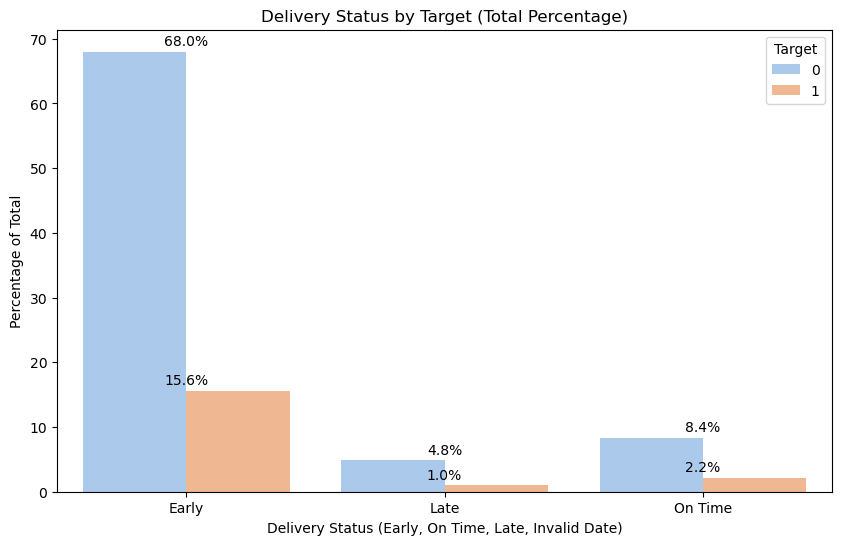

In [43]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

grouped_delivery_status = Train_encoded_try_time.groupby(['delivery_status', 'target90']).size().reset_index(name='count')
total_count_status = grouped_delivery_status['count'].sum()
grouped_delivery_status['percentage'] = grouped_delivery_status['count'] / total_count_status * 100

plt.figure(figsize=(10, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='delivery_status', 
    y='percentage', 
    hue='target90', 
    data=grouped_delivery_status, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped_delivery_status.itertuples():
    plt.text(
        x=p.delivery_status, 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Delivery Status (Early, On Time, Late, Invalid Date)')
plt.ylabel('Percentage of Total')
plt.title('Delivery Status by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()

The chart shows that most customers, whether they bought again (`Target 1`) or not (`Target 0`), received their packages early, with `68%` of non-returning customers having early deliveries, compared to `15.6%` of returning customers. Late delivery is rare but appears to slightly correlate with non-returning customers, while on-time delivery does not strongly impact repeat purchases.


In [44]:
Train_encoded_try_time.delivery_difference.describe()

count    25942.000000
mean       -17.216823
std         66.084479
min       -369.000000
25%        -12.000000
50%         -1.000000
75%         -1.000000
max        368.000000
Name: delivery_difference, dtype: float64

In [45]:
Train_encoded_try_time

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,On Time
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-17.216823,Early
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,27888,2008-06-16,2008-06-16,55,3,1,2008-06-18,2008-06-17,969,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.000000,Early
25938,28133,2008-06-07,2008-06-07,42,3,0,2008-06-10,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-17.216823,Early
25939,58472,2008-07-09,2008-07-09,91,1,1,2008-07-11,2008-07-10,205,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.000000,Early
25940,29315,2008-12-04,2008-12-04,41,2,1,2008-12-25,2008-12-04,978,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-21.000000,Early


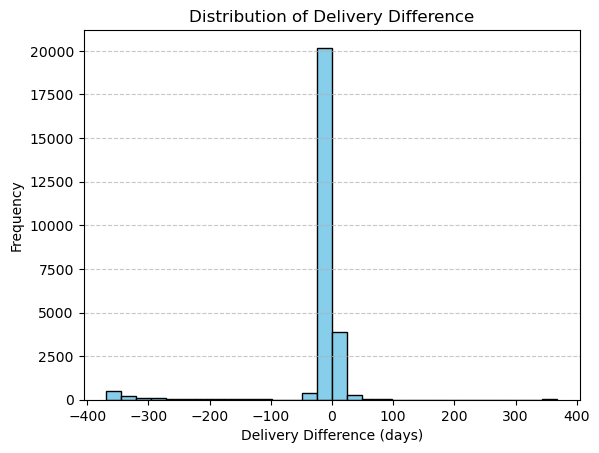

In [46]:
# Import necessary libraries
import matplotlib.pyplot as plt

plt.hist(Train_encoded_try_time['delivery_difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Difference')
plt.xlabel('Delivery Difference (days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Most people who bought again received their purchases early, while there does not seem to be any difference between on-time and late deliveries.

In [47]:
Train_encoded_try_time.head()

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,On Time
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-17.216823,Early
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early


In [48]:
Train_encoded_try_time.loc[Train_encoded_try_time['delivery_difference'].nsmallest(5).index]

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
190,13360,2008-08-26,2008-08-26,81,2,0,2009-08-31,2008-08-27,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-369.0,Early
1744,31952,2008-06-04,2008-06-04,89,6,0,2009-06-08,2008-06-04,1727,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-369.0,Early
2563,41497,2008-09-10,2008-09-10,69,1,0,2009-09-15,2008-09-11,139,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-369.0,Early
2822,39310,2008-11-26,2008-11-26,50,3,1,2009-11-30,2008-11-26,515,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-369.0,Early
2854,1713,2008-07-29,2008-07-29,42,1,0,2009-08-03,2008-07-30,820,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-369.0,Early


In [49]:
Train_encoded_try_time[Train_encoded_try_time['deliverydatereal'].dt.year == 2009]

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
80,52289,2008-12-30,2008-12-30,21,1,0,2009-01-01,2009-01-03,223,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,Late
127,3881,2008-12-30,2008-12-30,52,2,1,2009-01-08,2009-01-05,777,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.0,Early
133,46164,2008-12-23,2008-12-23,59,1,0,2009-01-06,2009-01-08,519,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,Late
252,14541,2008-12-28,2008-12-28,71,1,1,2009-01-13,2009-01-02,434,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-11.0,Early
337,17944,2008-12-28,2008-12-28,24,2,0,2008-12-30,2009-01-05,644,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,6.0,Late
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25825,39881,2008-09-19,2008-09-19,45,2,1,2009-09-22,2009-03-18,960,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-188.0,Early
25838,37326,2009-01-23,2008-04-09,52,1,1,2009-02-16,2009-02-13,1,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.0,Early
25860,30767,2008-12-15,2008-12-15,53,1,0,2009-12-17,2009-03-21,788,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-271.0,Early
25874,2202,2008-09-24,2008-09-24,37,1,0,2008-09-26,2009-09-04,109,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,343.0,Late


Investigating the data we realize that there are errors, like it does not make sense that a package arrives a year early or a year late, so we transform it in such a way that the year of the order is the same year of arrival i.e. if the customer ordered in 2008, his order should have arrived in 2008.

In [50]:
# Calculate the mean and standard deviation
mean_value = Train_encoded_try_time['delivery_difference'].mean()
std_value = Train_encoded_try_time['delivery_difference'].std()

# Calculate the limits of the outliers
lower_limit = mean_value - 2 * std_value
upper_limit = mean_value + 2 * std_value

# Filter outliers
outliers = Train_encoded_try_time[(Train_encoded_try_time['delivery_difference'] < lower_limit) | (Train_encoded_try_time['delivery_difference'] > upper_limit)]

# Count how many there are
num_outliers = len(outliers)

print(f"Number of outliers more than 2 standard deviations from the mean: {num_outliers}")

Number of outliers more than 2 standard deviations from the mean: 1110


In [51]:
# Filter rows where delivery_difference is between -100 and +100)
filtered_rows = Train_encoded_try_time[(Train_encoded_try_time['delivery_difference'] <-100) ]

# Show filtered rows
filtered_rows.head(4)

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
94,42914,2008-09-06,2008-09-06,12,1,0,2009-09-10,2008-09-17,442,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,-358.0,Early
190,13360,2008-08-26,2008-08-26,81,2,0,2009-08-31,2008-08-27,2,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-369.0,Early
202,54966,2008-08-22,2008-08-21,31,6,1,2009-08-25,2008-09-04,3406,0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,-355.0,Early
216,2506,2008-08-09,2008-08-09,35,1,0,2009-08-12,2008-10-24,1,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-292.0,Early


Seeing the outliers, where a delay of 1 year in the expected delivery date doesn't make sense when the order arrived within a few days, we decided to set the promised year to match the year of the order's purchase date.

In [52]:
Train_encoded[Train_encoded.deliverydatepromised == 0000-00-00]

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,voucher_1,case_1,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1


In [53]:
# Convert invalid dates in Train_encoded to NaT
Train_encoded['deliverydatereal'] = pd.to_datetime(
    Train_encoded['deliverydatereal'], errors='coerce'
)
Train_encoded['deliverydatepromised'] = pd.to_datetime(
    Train_encoded['deliverydatepromised'], errors='coerce'
)

Train_encoded['date'] = pd.to_datetime(Train_encoded['date'])
Train_encoded['deliverydatepromised'] = pd.to_datetime(Train_encoded['deliverydatepromised'])

Train_encoded['deliverydatepromised'] = Train_encoded.apply(
    lambda row: row['deliverydatepromised'].replace(year=row['date'].year), 
    axis=1
)

# Calculate the difference in days
Train_encoded['delivery_difference'] = (
    Train_encoded['deliverydatereal'] - Train_encoded['deliverydatepromised']
).dt.days

# Calculate mean and std, impute missing values
mean_difference = Train_encoded['delivery_difference'].mean(skipna=True)  
std_difference  = Train_encoded['delivery_difference'].std(skipna=True) 

# Replace NaN values ​​with the mean
Train_encoded['delivery_difference'] = Train_encoded['delivery_difference'].fillna(mean_difference)

# For extreme values ​​(>90 days), replace with mean + 1 std
Train_encoded.loc[
    Train_encoded['delivery_difference'] > 90, 
    'delivery_difference'
] = mean_difference + std_difference

# Classify deliveries
def classify_delivery(days_diff):
    if pd.isna(days_diff):
        return 'Invalid Date'
    elif days_diff < 0:
        return 'Early'
    elif days_diff == 0:
        return 'On Time'
    else:
        return 'Late'

Train_encoded['delivery_status'] = Train_encoded['delivery_difference'].apply(classify_delivery)

# View the result in the new DataFrame
Train_encoded[['deliverydatereal', 'deliverydatepromised', 'delivery_difference', 'delivery_status']].head(5)

,deliverydatereal,deliverydatepromised,delivery_difference,delivery_status
0,2008-08-12,2008-08-12,0.000000,On Time
1,2008-05-17,2008-05-20,-3.000000,Early
2,NaT,2008-12-16,8.379869,Late
3,2008-06-07,2008-06-10,-3.000000,Early
4,2008-11-14,2008-11-17,-3.000000,Early


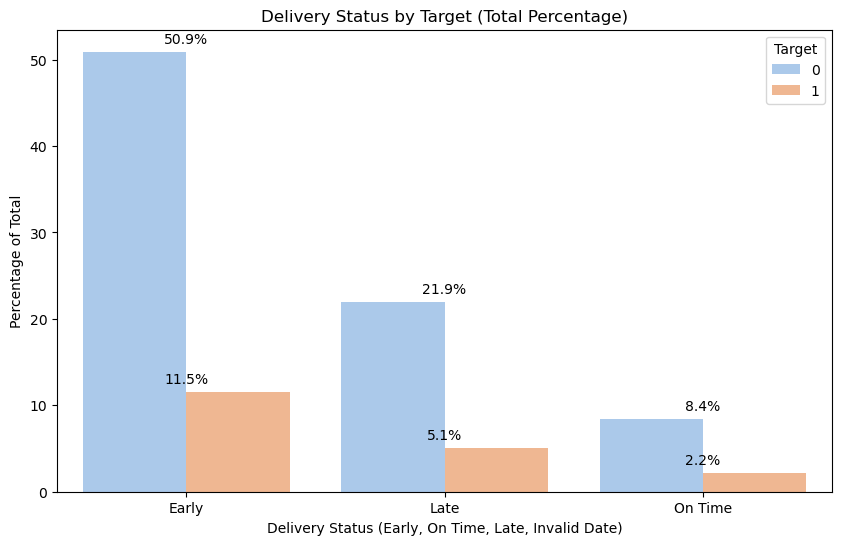

In [54]:
# Import necessary libaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

grouped_delivery_status = Train_encoded.groupby(['delivery_status', 'target90']).size().reset_index(name='count')
total_count_status = grouped_delivery_status['count'].sum()
grouped_delivery_status['percentage'] = grouped_delivery_status['count'] / total_count_status * 100

plt.figure(figsize=(10, 6))

# Create a bar plot for total percentages
sns.barplot(
    x='delivery_status', 
    y='percentage', 
    hue='target90', 
    data=grouped_delivery_status, 
    palette="pastel"
)

# Add percentages on the bars
for p in grouped_delivery_status.itertuples():
    plt.text(
        x=p.delivery_status, 
        y=p.percentage + 1, 
        s=f"{p.percentage:.1f}%", 
        ha='center'
    )

# Labeling the plot
plt.xlabel('Delivery Status (Early, On Time, Late, Invalid Date)')
plt.ylabel('Percentage of Total')
plt.title('Delivery Status by Target (Total Percentage)')
plt.legend(title='Target')

plt.show()

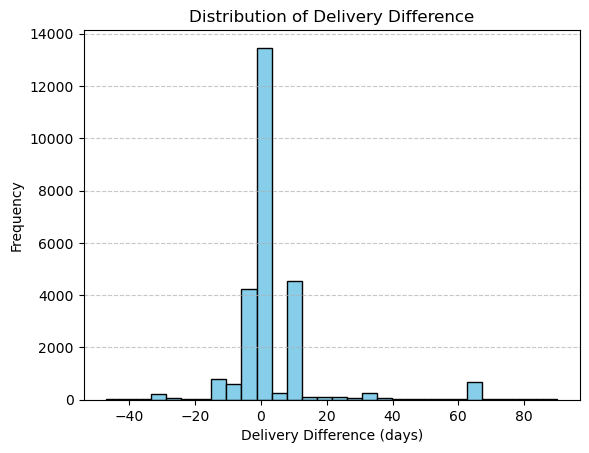

In [55]:
# Import necessary libraries
import matplotlib.pyplot as plt

plt.hist(Train_encoded['delivery_difference'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Delivery Difference')
plt.xlabel('Delivery Difference (days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

We attempted two transformations because the deliveryDatePromised likely has some issues.

First, we addressed the majority of excessively early deliveries by setting the promised year to match the year of the order placement, as this makes sense.

Second, for very extreme values, we replaced them with the mean of the values plus one standard deviation to ensure they fall within a normal range.

In [56]:
Train_encoded

,customernumber,date,datecreated,invoicepostcode,numberitems,entry,deliverydatepromised,deliverydatereal,weight,remi,...,case_2,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status
0,35118,2008-07-29,2008-07-29,36,2,0,2008-08-12,2008-08-12,741,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,On Time
1,65816,2008-05-16,2008-05-16,20,1,0,2008-05-20,2008-05-17,729,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
2,55818,2008-12-14,2008-12-14,20,1,0,2008-12-16,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.379869,Late
3,34566,2008-05-26,2008-05-26,76,2,0,2008-06-10,2008-06-07,571,0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
4,55290,2008-11-13,2008-11-13,31,2,1,2008-11-17,2008-11-14,1049,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25937,27888,2008-06-16,2008-06-16,55,3,1,2008-06-18,2008-06-17,969,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-1.000000,Early
25938,28133,2008-06-07,2008-06-07,42,3,0,2008-06-10,NaT,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.379869,Late
25939,58472,2008-07-09,2008-07-09,91,1,1,2008-07-11,2008-07-10,205,0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.000000,Early
25940,29315,2008-12-04,2008-12-04,41,2,1,2008-12-25,2008-12-04,978,0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-21.000000,Early


###  Continuouing with the new lable: `Product_diversity`

In [57]:
# Counting different from product'w0' to 'w10' exist in the DataFrame
Train_encoded['Product_diversity'] = np.count_nonzero(Train_encoded[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10']], axis=1)

In [58]:
Train_encoded.Product_diversity.describe()

count    25942.000000
mean         1.188459
std          0.516996
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          5.000000
Name: Product_diversity, dtype: float64

In [59]:
Train_encoded.select_dtypes(exclude=['number']).columns

Index(['date', 'datecreated', 'deliverydatepromised', 'deliverydatereal',
       'delivery_status'],
      dtype='object')

In [60]:
Train_finish = Train_encoded.copy()

In [61]:
Train_finish.drop(columns=["date","datecreated","deliverydatepromised","deliverydatereal"],inplace=True)

In [62]:
Train_finish.head(3)

,customernumber,invoicepostcode,numberitems,entry,weight,remi,cancel,used,w0,w1,...,case_3,case_4,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,delivery_status,Product_diversity
0,35118,36,2,0,741,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.000000,On Time,1
1,65816,20,1,0,729,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,-3.000000,Early,1
2,55818,20,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,8.379869,Late,1


In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Instantiate the OneHotEncoder
ohe_delivery_status = OneHotEncoder(sparse_output=False)

# Fit and transform the 'delivery_status' column
delivery_status_encoded = ohe_delivery_status.fit_transform(Train_finish[['delivery_status']])

# Create a DataFrame with the transformed output
df_delivery_status_ohe = pd.DataFrame(
    delivery_status_encoded,
    columns=ohe_delivery_status.get_feature_names_out(['delivery_status'])
)

# Rename the columns if you want a more custom name
df_delivery_status_ohe.columns = [
    col.replace("delivery_status_", "ds_") for col in df_delivery_status_ohe.columns
]

# Concatenate with the original DataFrame, excluding the old column
Train_finish_ohe = pd.concat(
    [Train_finish.drop(columns=['delivery_status']), df_delivery_status_ohe],
    axis=1
)

# Print new dataframe
Train_finish_ohe.head()

,customernumber,invoicepostcode,numberitems,entry,weight,remi,cancel,used,w0,w1,...,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,Product_diversity,ds_Early,ds_Late,ds_On Time
0,35118,36,2,0,741,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.000000,1,0.0,0.0,1.0
1,65816,20,1,0,729,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,-3.000000,1,1.0,0.0,0.0
2,55818,20,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,8.379869,1,0.0,1.0,0.0
3,34566,76,2,0,571,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,-3.000000,1,1.0,0.0,0.0
4,55290,31,2,1,1049,0,0,0,2,0,...,0.0,1.0,0.0,1.0,0.0,-3.000000,1,1.0,0.0,0.0


### 5.4 Transform test data with the process used before

In [64]:
# Drop irrelevant columns from Test data
Test_variables = Test.drop(columns=["delivpostcode", "advertisingdatacode", "points"])

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# One-hot encode categorical variables
categorical_mappings = {
    'salutation': {0: 'Ms.', 1: 'Mr.', 2: 'Company'},
    'title': {0: 'No', 1: 'Yes'},
    'domain': {
        0: 'aol.com', 1: 'arcor.de', 2: 'freenet.de', 3: 'gmail.com',
        4: 'gmx.de', 5: 'hotmail.de', 6: 'online.de', 7: 'onlinehome.de',
        8: 't-online.de', 9: 'web.de', 10: 'yahoo.com', 11: 'yahoo.de', 12: 'others'
    },
    'newsletter': {0: 'No', 1: 'Yes'},
    'model': {1: '1', 2: '2', 3: '3'},
    'paymenttype': {
        0: 'Payment_on_invoice', 1: 'Cash_payment',
        2: 'Transfer_from_current_account', 3: 'Transfer_from_credit_card'
    },
    'deliverytype': {0: 'Dispatch', 1: 'Collection'},
    'voucher': {0: 'No', 1: 'Yes'},
    'case': {1: 'Low', 5: 'High'},
    'gift': {0: 'No', 1: 'Yes'},
    'shippingcosts': {0: 'No', 1: 'Yes'}
}

# Select columns to encode
columns_to_encode = list(categorical_mappings.keys())

# Initialize OneHotEncoder
ohe = (
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    .set_output(transform="pandas")
)

# Apply OneHotEncoder
encoded_columns = ohe.fit_transform(Test_variables[columns_to_encode])

# Rename the encoded columns
feature_names = ohe.get_feature_names_out(columns_to_encode)
renamed_columns = [
    f"{col}_{categorical_mappings[col].get(int(category.split('_')[1]), category)}"
    if col in categorical_mappings and category.split('_')[1].isdigit()
    else category
    for col, category in zip(feature_names, feature_names)
]

encoded_columns.columns = renamed_columns

# Combine the original non-encoded columns with the encoded ones
non_encoded_columns = Test_variables.drop(columns=columns_to_encode)
Test_encoded = pd.concat([non_encoded_columns.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

# Convert invalid dates in Test_encoded to NaT
Test_encoded['deliverydatereal'] = pd.to_datetime(Test_encoded['deliverydatereal'], errors='coerce')
Test_encoded['deliverydatepromised'] = pd.to_datetime(Test_encoded['deliverydatepromised'], errors='coerce')

# Calculate the difference in days
Test_encoded['delivery_difference'] = (
    Test_encoded['deliverydatereal'] - Test_encoded['deliverydatepromised']
).dt.days

# Impute invalid differences with the mean
mean_difference = Test_encoded['delivery_difference'].mean(skipna=True)
std_difference = Test_encoded['delivery_difference'].std(skipna=True)

Test_encoded['delivery_difference'] = Test_encoded['delivery_difference'].fillna(mean_difference)

# Replace extreme values (> 90 days) with mean + 1 std
Test_encoded.loc[
    Test_encoded['delivery_difference'] > 90, 'delivery_difference'
] = mean_difference + std_difference

# Classify deliveries
def classify_delivery(days_diff):
    if pd.isna(days_diff):
        return 'Invalid Date'
    elif days_diff < 0:
        return 'Early'
    elif days_diff == 0:
        return 'On Time'
    else:
        return 'Late'

Test_encoded['delivery_status'] = Test_encoded['delivery_difference'].apply(classify_delivery)

# Product diversity calculation
Test_encoded['Product_diversity'] = np.count_nonzero(
    Test_encoded[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10']], axis=1
)

Test_finish = Test_encoded.copy()

# Drop date-related columns
Test_finish.drop(columns=["date", "datecreated", "deliverydatepromised", "deliverydatereal"], inplace=True)

# Encode delivery_status
ohe_delivery_status = OneHotEncoder(sparse_output=False)
delivery_status_encoded = ohe_delivery_status.fit_transform(Test_finish[['delivery_status']])

df_delivery_status_ohe = pd.DataFrame(
    delivery_status_encoded,
    columns=ohe_delivery_status.get_feature_names_out(['delivery_status'])
)

df_delivery_status_ohe.columns = [
    col.replace("delivery_status_", "ds_") for col in df_delivery_status_ohe.columns
]

Test_finish_ohe = pd.concat(
    [Test_finish.drop(columns=['delivery_status']), df_delivery_status_ohe],
    axis=1
)

Test_finish_ohe.head()

,customernumber,invoicepostcode,numberitems,entry,weight,remi,cancel,used,w0,w1,...,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,Product_diversity,ds_Early,ds_Late,ds_On Time
0,37269,33,1,0,672,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,1.0,1,0.0,1.0,0.0
1,59202,22,1,1,313,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1,0.0,0.0,1.0
2,33002,58,1,0,870,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,-1.0,1,1.0,0.0,0.0
3,4470,70,1,1,175,0,0,0,0,0,...,0.0,1.0,0.0,0.0,1.0,-1.0,1,1.0,0.0,0.0
4,32151,40,3,1,916,0,0,0,3,0,...,0.0,1.0,0.0,1.0,0.0,-1.0,1,1.0,0.0,0.0


In [65]:
Test_finish_ohe.shape

(6486, 65)

##  6.  Model Tuning 

### 6.1 Custom Metric for Revenue Optimization

### Custom Revenue Metric Explanation

 The follwing is the logic the expected revenue of using the model to predict which costumer we should give a voucher and the winnig and losing reveneu expected depending of the model clasifications. Notice than a value of `0` is someone than should received a voucher that properly clasified this costumer will increase reveneu in €1.25 while clasifing  a `1` a person that no matter if will send a voucher as a `0` will decrease revenues in €5 so:  

1. **True Negative (TN)**: The model predicts no voucher for a customer who wouldn’t have bought again (`true == 0` and `pred == 0`).  
   - **Gain:** €1.25

2. **False Negative (FN)**: The model predicts no voucher for a customer who would have placed an order (`true == 1` and `pred == 0`).  
   - **Loss:** €5

No other cases affect this revenue calculation, The function sums the gains and losses for a final revenue score. In most cases the metric specificity will be a good want to choose in this problem (The true negative rate) but given that giving a voucher to a person who would buy again would cost 4 ricght prediction for churn or custom metric tries to optimize the expected revenue.

In [69]:
# Import necessary libraries
import os
import json
import joblib
import optuna
from optuna.samplers import TPESampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def custom_revenue_metric(y_true, y_pred):
    # Defining our winnings and losses of the confusion matrix
    tn_gain = 1.25  
    fn_loss = -5    

    total_gain = 0
    total_loss = 0
    revenue = 0

    for true, pred in zip(y_true, y_pred):
        if pred == 0 and true == 0:  # TN winnings of €1.25 each 
            total_gain += tn_gain
        elif pred == 0 and true == 1:  # FN losses of €5 each
            total_loss += fn_loss

    revenue = total_gain + total_loss
    return total_gain, total_loss, revenue


# Setting our train and test set 
X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']


In [67]:
intentional error 

SyntaxError: invalid syntax (4014784074.py, line 1)

# 6.2 Tool for best Hyperparameter Optimization Optuna

Optuna is a  is a python library that helps searching the best hyperparameters for our ml models. It tries different combinations intelligently and stops unpromising ones early to save time.
It works as following:

1. We choose a model i.e KNN set a objective normal metric such as acurracy or a custom one. 

2. We sugest values for the hyperparameters such as n_neighbors(5,20) and leaf_size(30,80).

3. Last we create the study selective if we want to minizes the objective or in our case maximes the revenues and add the numer of trials.

The package will run the number of trials while in each trial showing results, and intelligently trying parameters that are not performing well while keeping the ones that are promising to optimize the objective function efficiently.

More info can be obtained in the following links:
https://optuna.org/ & 
https://dl.acm.org/doi/10.1145/3292500.3330701

## 6.2 KNN model 

[I 2025-01-17 11:56:10,879] A new study created in memory with name: no-name-1e7404b3-e56e-483a-81a1-cb291dd5cd46
[I 2025-01-17 11:56:11,216] Trial 0 finished with value: 775.0 and parameters: {'n_neighbors': 39, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-17 11:56:11,657] Trial 1 finished with value: 773.75 and parameters: {'n_neighbors': 25, 'weights': 'uniform', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-17 11:56:11,934] Trial 2 finished with value: 727.5 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-17 11:56:12,198] Trial 3 finished with value: 688.75 and parameters: {'n_neighbors': 1, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-17 11:56:12,524] Trial 4 finished with value: 773.75 and parameters: {'n_neighbors': 37, 'weights': 'distance', 'p': 2}. Best is trial 0 with value: 775.0.
[I 2025-01-17 11:56:12,840] Trial 5 finished with value:

Best Parameters (KNN): {'n_neighbors': 34, 'weights': 'distance', 'p': 2}
Best Net Revenue (KNN): 778.75

Total Money Won (KNN): €6633.75
Total Money Lost (KNN): €-5855.00
Net Revenue (KNN): €778.75

Accuracy (on test set, KNN): 0.819

Classification Report (KNN):
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      5310
           1       0.62      0.00      0.01      1176

    accuracy                           0.82      6486
   macro avg       0.72      0.50      0.45      6486
weighted avg       0.78      0.82      0.74      6486


Best KNN model saved at 'Output/best_model_KNN.joblib'.
Complete KNN study saved at 'Output/study_KNN.joblib'.

Process completed (KNN).


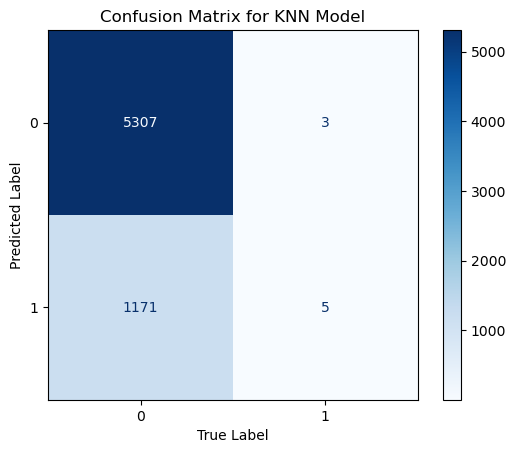

In [142]:
# Import necessary libraries
import os
import json
import joblib
import optuna
from optuna.samplers import TPESampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Setting our train and test set 
X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 1, 50)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    p = trial.suggest_int('p', 1, 2)  
    knn = KNeighborsClassifier(
        n_neighbors=n_neighbors,
        weights=weights,
        p=p
    )
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    _, _, net_revenue = custom_revenue_metric(y_test, y_pred)

    return net_revenue

#  We used TPESampler to our result to be reproductable
sampler_knn = TPESampler(seed=10)  # 10 For reproducibility
study_knn = optuna.create_study(direction='maximize', sampler=sampler_knn)
study_knn.optimize(objective_knn, n_trials=40)

print("Best Parameters (KNN):", study_knn.best_params)
print("Best Net Revenue (KNN):", study_knn.best_value)

# Know our best Knn model
knn_best_params = study_knn.best_params
knn_best_model = KNeighborsClassifier(
    **knn_best_params
)
knn_best_model.fit(X_train, y_train)

# Evaluate our model in the test set 
y_pred_knn = knn_best_model.predict(X_test)
total_gain_knn, total_loss_knn, final_revenue_knn = custom_revenue_metric(y_test, y_pred_knn)

print(f"\nTotal Money Won (KNN): €{total_gain_knn:.2f}")
print(f"Total Money Lost (KNN): €{total_loss_knn:.2f}")
print(f"Net Revenue (KNN): €{final_revenue_knn:.2f}")

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"\nAccuracy (on test set, KNN): {accuracy_knn:.3f}")
print("\nClassification Report (KNN):")
print(classification_report(y_test, y_pred_knn, zero_division=0))

# Save in output our model
os.makedirs("Output", exist_ok=True)

# Save best knn model
model_path_knn = "Output/best_model_KNN.joblib"
joblib.dump(knn_best_model, model_path_knn)
print(f"\nBest KNN model saved at '{model_path_knn}'.")

# Save the study 
study_path_knn = "Output/study_KNN.joblib"
joblib.dump(study_knn, study_path_knn)
print(f"Complete KNN study saved at '{study_path_knn}'.")

print("\nProcess completed (KNN).")

# Compute confusion matrix
cm_kn = confusion_matrix(y_test, y_pred_knn)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_kn, display_labels=knn_best_model.classes_)
disp.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for KNN Model")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()


Optimal Threshold: 0.28
Maximum Revenue with Optimal Threshold: €868.75

Final Revenue with Optimal Threshold: €868.75

Accuracy (on test set with threshold): 0.758

Classification Report (with threshold):
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      5310
           1       0.22      0.14      0.17      1176

    accuracy                           0.76      6486
   macro avg       0.52      0.52      0.51      6486
weighted avg       0.72      0.76      0.73      6486



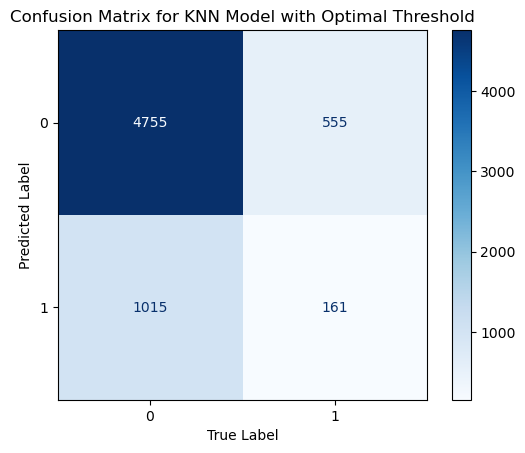

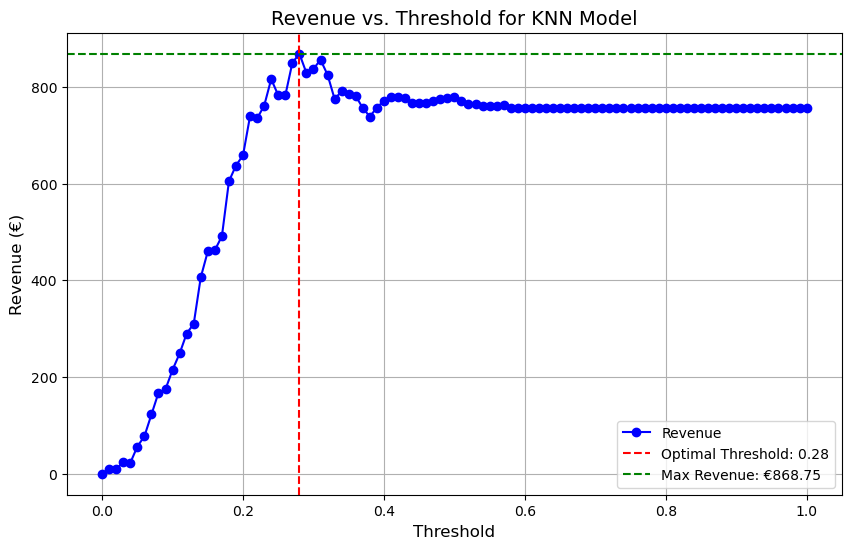

In [143]:
y_prob_knn = knn_best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

best_threshold_knn = 0
best_revenue_knn = float('-inf')

thresholds_knn = np.linspace(0, 1, 101)  # All possible thresholds
revenues_knn = []

# Calculate revenue for each threshold
for threshold_knn in thresholds_knn:
    y_pred_threshold_knn = (y_prob_knn >= threshold_knn).astype(int)
    
    _, _, revenue_knn = custom_revenue_metric(y_test, y_pred_threshold_knn)
    revenues_knn.append(revenue_knn)
    
    if revenue_knn > best_revenue_knn:
        best_revenue_knn = revenue_knn
        best_threshold_knn = threshold_knn

print(f"\nOptimal Threshold: {best_threshold_knn:.2f}")
print(f"Maximum Revenue with Optimal Threshold: €{best_revenue_knn:.2f}")

y_pred_final_knn = (y_prob_knn >= best_threshold_knn).astype(int)

# Final revenue
_, _, final_revenue_threshold_knn = custom_revenue_metric(y_test, y_pred_final_knn)
print(f"\nFinal Revenue with Optimal Threshold: €{final_revenue_threshold_knn:.2f}")

# Final metrics
accuracy_final_knn = accuracy_score(y_test, y_pred_final_knn)
print(f"\nAccuracy (on test set with threshold): {accuracy_final_knn:.3f}")
print("\nClassification Report (with threshold):")
print(classification_report(y_test, y_pred_final_knn, zero_division=0))

cm_threshold_knn = confusion_matrix(y_test, y_pred_final_knn)

# Display updated confusion matrix
disp_threshold_knn = ConfusionMatrixDisplay(confusion_matrix=cm_threshold_knn, display_labels=knn_best_model.classes_)
disp_threshold_knn.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for KNN Model with Optimal Threshold")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

# Plot the revenue vs. threshold graph
plt.figure(figsize=(10, 6))
plt.plot(thresholds_knn, revenues_knn, marker='o', linestyle='-', color='b', label='Revenue')
plt.axvline(best_threshold_knn, color='r', linestyle='--', label=f'Optimal Threshold: {best_threshold_knn:.2f}')
plt.axhline(best_revenue_knn, color='g', linestyle='--', label=f'Max Revenue: €{best_revenue_knn:.2f}')

# Add labels, title, and legend
plt.title('Revenue vs. Threshold for KNN Model', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Revenue (€)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

Our KNN model was optimized with the best parameters: 34 neighbors, using distance-based weights, and the Euclidean distance metric (p = 2). This configuration helped achieve an optimal threshold of 0.28, maximizing revenue to €868.75.

## 6.3 Random Forest

In [144]:
# Import necessary libraries
import os
import json
import joblib
import optuna
from optuna.samplers import TPESampler
from optuna.pruners import MedianPruner
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# Define the objective function for Optuna
def objective_rf(trial):
    # Hyperparameter suggestions for RandomForest
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 30)
    
    # Suggest a value to weight the positive class (class 1)
    # Here, class 0 will have a weight of 1, and class 1 a weight varying between 0.5 and 5.0.
    class_1_weight = trial.suggest_float('class_1_weight', 0.5, 5)
    class_weight = {0: 1, 1: class_1_weight}
    
    # Instantiate the RandomForestClassifier with the class_weight parameter
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        class_weight=class_weight,
        random_state=42
    )
    
    # Train on the training data
    rf.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred_rf = rf.predict(X_test)
    
    # Calculate the revenue metric
    _, _, net_revenue = custom_revenue_metric(y_test, y_pred_rf)
    
    # Report the intermediate result to the trial for possible pruning.
    trial.report(net_revenue, step=1)
    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()
    
    return net_revenue

# Set up the Optuna study with reproducibility and a pruning mechanism
sampler_rf = TPESampler(seed=45)
pruner = MedianPruner(n_startup_trials=5, n_warmup_steps=0, interval_steps=1)
study_rf = optuna.create_study(direction='maximize', sampler=sampler_rf, pruner=pruner)
study_rf.optimize(objective_rf, n_trials=800)

print("Best Parameters (Random Forest):", study_rf.best_params)
print("Best Net Revenue (Random Forest):", study_rf.best_value)

# Build and train the best model with the optimal hyperparameters
rf_best_params = study_rf.best_params

rf_best_model = RandomForestClassifier(
    n_estimators=rf_best_params['n_estimators'],
    max_depth=rf_best_params['max_depth'],
    min_samples_split=rf_best_params['min_samples_split'],
    min_samples_leaf=rf_best_params['min_samples_leaf'],
    class_weight={0: 1, 1: rf_best_params['class_1_weight']},
    random_state=42
)
rf_best_model.fit(X_train, y_train)

# Evaluate the model
y_pred_rf = rf_best_model.predict(X_test)
total_gain_rf, total_loss_rf, final_revenue_rf = custom_revenue_metric(y_test, y_pred_rf)

print(f"\nTotal Money Won (Random Forest): €{total_gain_rf:.2f}")
print(f"Total Money Lost (Random Forest): €{total_loss_rf:.2f}")
print(f"Net Revenue (Random Forest): €{final_revenue_rf:.2f}")

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nAccuracy (on test set, Random Forest): {accuracy_rf:.3f}")
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Save outputs for later use
os.makedirs("Output", exist_ok=True)

model_path_rf = "Output/best_model_RF.joblib"
joblib.dump(rf_best_model, model_path_rf)
print(f"\nBest Random Forest model saved at '{model_path_rf}'.")

study_path_rf = "Output/study_RF.joblib"
joblib.dump(study_rf, study_path_rf)
print(f"Complete Random Forest study saved at '{study_path_rf}'.")

[I 2025-01-17 11:56:30,892] A new study created in memory with name: no-name-80bda199-48d5-44cd-9a2a-cac2cdafd918
[I 2025-01-17 11:56:35,154] Trial 0 finished with value: 1028.75 and parameters: {'n_estimators': 199, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 3, 'class_1_weight': 2.500112731873114}. Best is trial 0 with value: 1028.75.
[I 2025-01-17 11:56:36,209] Trial 1 finished with value: 1372.5 and parameters: {'n_estimators': 121, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 4, 'class_1_weight': 3.323262572169917}. Best is trial 1 with value: 1372.5.
[I 2025-01-17 11:56:39,191] Trial 2 finished with value: 1283.75 and parameters: {'n_estimators': 179, 'max_depth': 34, 'min_samples_split': 30, 'min_samples_leaf': 15, 'class_1_weight': 3.282325176053112}. Best is trial 1 with value: 1372.5.
[I 2025-01-17 11:56:40,762] Trial 3 finished with value: 823.75 and parameters: {'n_estimators': 92, 'max_depth': 49, 'min_samples_split': 21, 'min_samples_leaf'

Best Parameters (Random Forest): {'n_estimators': 53, 'max_depth': 13, 'min_samples_split': 15, 'min_samples_leaf': 30, 'class_1_weight': 4.391183483416911}
Best Net Revenue (Random Forest): 1615.0

Total Money Won (Random Forest): €4490.00
Total Money Lost (Random Forest): €-2875.00
Net Revenue (Random Forest): €1615.00

Accuracy (on test set, Random Forest): 0.646

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      5310
           1       0.26      0.51      0.34      1176

    accuracy                           0.65      6486
   macro avg       0.56      0.59      0.55      6486
weighted avg       0.75      0.65      0.68      6486


Best Random Forest model saved at 'Output/best_model_RF.joblib'.
Complete Random Forest study saved at 'Output/study_RF.joblib'.

Process completed (Random Forest).


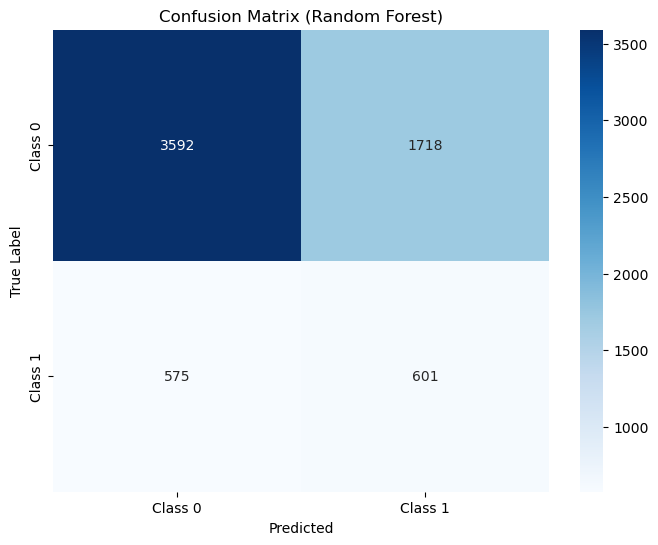

In [71]:

rf_best_model= joblib.load("Output/best_model_RF.joblib")
y_pred_rf = rf_best_model.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (Random Forest)")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()


Optimal Threshold: 0.50
Maximum Revenue with Optimal Threshold: €1615.00

Final Revenue with Optimal Threshold: €1615.00

Accuracy (on test set with threshold): 0.646

Classification Report (with threshold):
              precision    recall  f1-score   support

           0       0.86      0.68      0.76      5310
           1       0.26      0.51      0.34      1176

    accuracy                           0.65      6486
   macro avg       0.56      0.59      0.55      6486
weighted avg       0.75      0.65      0.68      6486



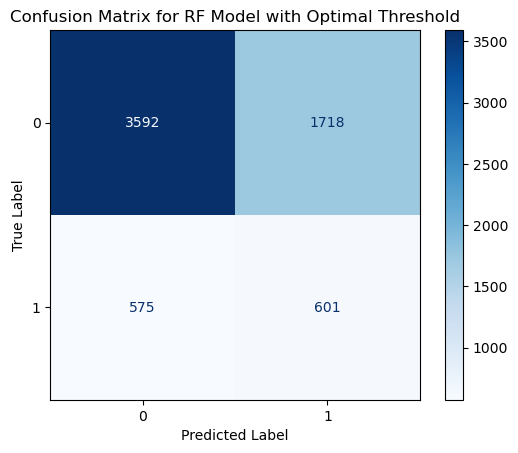

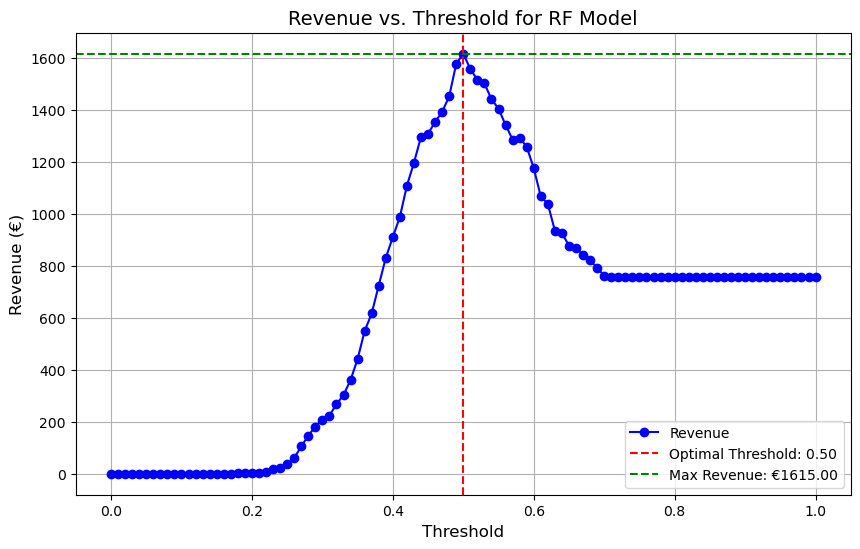

In [73]:

# Import necessary libraries
import joblib

rf_best_model = joblib.load("Output/best_model_RF.joblib")

y_prob_rf = rf_best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

best_threshold_rf = 0
best_revenue_rf = float('-inf')

thresholds_rf = np.linspace(0, 1, 101)  # All possible thresholds
revenues_rf = []

# Calculate revenue for each threshold
for threshold_rf in thresholds_rf:
    y_pred_threshold_rf = (y_prob_rf >= threshold_rf).astype(int)
    
    _, _, revenue_rf = custom_revenue_metric(y_test, y_pred_threshold_rf)
    revenues_rf.append(revenue_rf)
    
    if revenue_rf > best_revenue_rf:
        best_revenue_rf = revenue_rf
        best_threshold_rf = threshold_rf

print(f"\nOptimal Threshold: {best_threshold_rf:.2f}")
print(f"Maximum Revenue with Optimal Threshold: €{best_revenue_rf:.2f}")

y_pred_final_rf = (y_prob_rf >= best_threshold_rf).astype(int)

# Final revenue
_, _, final_revenue_threshold_rf = custom_revenue_metric(y_test, y_pred_final_rf)
print(f"\nFinal Revenue with Optimal Threshold: €{final_revenue_threshold_rf:.2f}")

# Final metrics
accuracy_final_rf = accuracy_score(y_test, y_pred_final_rf)
print(f"\nAccuracy (on test set with threshold): {accuracy_final_rf:.3f}")
print("\nClassification Report (with threshold):")
print(classification_report(y_test, y_pred_final_rf, zero_division=0))

cm_threshold_rf = confusion_matrix(y_test, y_pred_final_rf)

# Display updated confusion matrix
disp_threshold_rf = ConfusionMatrixDisplay(confusion_matrix=cm_threshold_rf, display_labels=rf_best_model.classes_)
disp_threshold_rf.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for RF Model with Optimal Threshold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the revenue vs. threshold graph
plt.figure(figsize=(10, 6))
plt.plot(thresholds_rf, revenues_rf, marker='o', linestyle='-', color='b', label='Revenue')
plt.axvline(best_threshold_rf, color='r', linestyle='--', label=f'Optimal Threshold: {best_threshold_rf:.2f}')
plt.axhline(best_revenue_rf, color='g', linestyle='--', label=f'Max Revenue: €{best_revenue_rf:.2f}')

# Add labels, title, and legend
plt.title('Revenue vs. Threshold for RF Model', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Revenue (€)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()



The Random Forest model was optimized with the best parameters: 53 estimators, a maximum depth of 13, a minimum of 15 samples required to split a node, 30 samples per leaf, and a class 1 weight of 4.39. This configuration achieved an optimal threshold of 0.50, resulting in a maximum revenue of €1615.00. Almost the double of reveneu as the KNN model with a great detections fo class 1 given the penalty of 4.4 set in our grid seatch with optuna

#

## 6.4 Gradient Boosting

In [147]:
# Import necessary libraries
import os
import json
import joblib
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# GB tunnig
def objective_gb(trial):
    # Suggest hyperparameters for Gradient Boosting
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    gb = GradientBoostingClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    gb.fit(X_train, y_train)

    y_pred_gb = gb.predict(X_test)

    _, _, net_revenue = custom_revenue_metric(y_test, y_pred_gb)

    # Optuna will maximize net_revenue
    return net_revenue

# Seed for study
sampler_gb = TPESampler(seed=4544144)  # For reproducibility
study_gb = optuna.create_study(direction='maximize', sampler=sampler_gb)
study_gb.optimize(objective_gb, n_trials=10)

print("Best Parameters (Gradient Boosting):", study_gb.best_params)
print("Best Net Revenue (Gradient Boosting):", study_gb.best_value)

# GB best parameters
gb_best_params = study_gb.best_params
gb_best_model = GradientBoostingClassifier(
    **gb_best_params,
    random_state=425
)
gb_best_model.fit(X_train, y_train)

# Testing on validation
y_pred_gb = gb_best_model.predict(X_test)
total_gain_gb, total_loss_gb, final_revenue_gb = custom_revenue_metric(y_test, y_pred_gb)

print(f"\nTotal Money Won (Gradient Boosting): €{total_gain_gb:.2f}")
print(f"Total Money Lost (Gradient Boosting): €{total_loss_gb:.2f}")
print(f"Net Revenue (Gradient Boosting): €{final_revenue_gb:.2f}")

accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"\nAccuracy (on test set, Gradient Boosting): {accuracy_gb:.3f}")
print("\nClassification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb, zero_division=0))

os.makedirs("output", exist_ok=True)
model_path_gb = "Output/best_model_GB.joblib"
joblib.dump(gb_best_model, model_path_gb)
print(f"\nBest Gradient Boosting model saved at '{model_path_gb}'.")

study_path_gb = "Output/study_GB.joblib"
joblib.dump(study_gb, study_path_gb)
print(f"Complete Gradient Boosting study saved at '{study_path_gb}'.")

print("\nProcess completed (Gradient Boosting).")

[I 2025-01-17 12:11:06,723] A new study created in memory with name: no-name-c9e20a4d-825b-4a42-9869-be6c10617df2
[I 2025-01-17 12:12:34,377] Trial 0 finished with value: 861.25 and parameters: {'n_estimators': 491, 'max_depth': 15, 'learning_rate': 0.060401553982556366, 'min_samples_split': 3, 'min_samples_leaf': 6}. Best is trial 0 with value: 861.25.
[I 2025-01-17 12:12:54,627] Trial 1 finished with value: 907.5 and parameters: {'n_estimators': 198, 'max_depth': 10, 'learning_rate': 0.19017645466654912, 'min_samples_split': 7, 'min_samples_leaf': 11}. Best is trial 1 with value: 907.5.
[I 2025-01-17 12:14:37,941] Trial 2 finished with value: 876.25 and parameters: {'n_estimators': 292, 'max_depth': 41, 'learning_rate': 0.08942529417445833, 'min_samples_split': 11, 'min_samples_leaf': 10}. Best is trial 1 with value: 907.5.
[I 2025-01-17 12:15:37,760] Trial 3 finished with value: 891.25 and parameters: {'n_estimators': 301, 'max_depth': 19, 'learning_rate': 0.015403362375639882, 'min

Best Parameters (Gradient Boosting): {'n_estimators': 198, 'max_depth': 10, 'learning_rate': 0.19017645466654912, 'min_samples_split': 7, 'min_samples_leaf': 11}
Best Net Revenue (Gradient Boosting): 907.5

Total Money Won (Gradient Boosting): €6417.50
Total Money Lost (Gradient Boosting): €-5550.00
Net Revenue (Gradient Boosting): €867.50

Accuracy (on test set, Gradient Boosting): 0.802

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5310
           1       0.27      0.06      0.09      1176

    accuracy                           0.80      6486
   macro avg       0.55      0.51      0.49      6486
weighted avg       0.72      0.80      0.74      6486


Best Gradient Boosting model saved at 'Output/best_model_GB.joblib'.
Complete Gradient Boosting study saved at 'Output/study_GB.joblib'.

Process completed (Gradient Boosting).


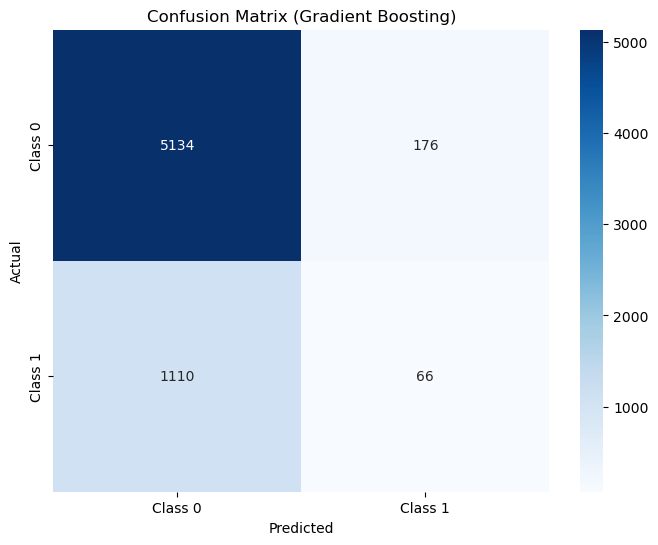

In [148]:
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (Gradient Boosting)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Optimal Threshold: 0.17
Maximum Revenue with Optimal Threshold: €1047.50

Final Revenue with Optimal Threshold: €1047.50

Accuracy (on test set with threshold): 0.660

Classification Report (with threshold):
              precision    recall  f1-score   support

           0       0.84      0.73      0.78      5310
           1       0.22      0.36      0.28      1176

    accuracy                           0.66      6486
   macro avg       0.53      0.54      0.53      6486
weighted avg       0.73      0.66      0.69      6486



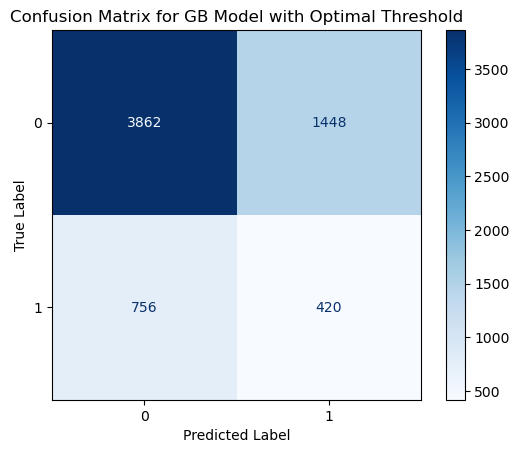

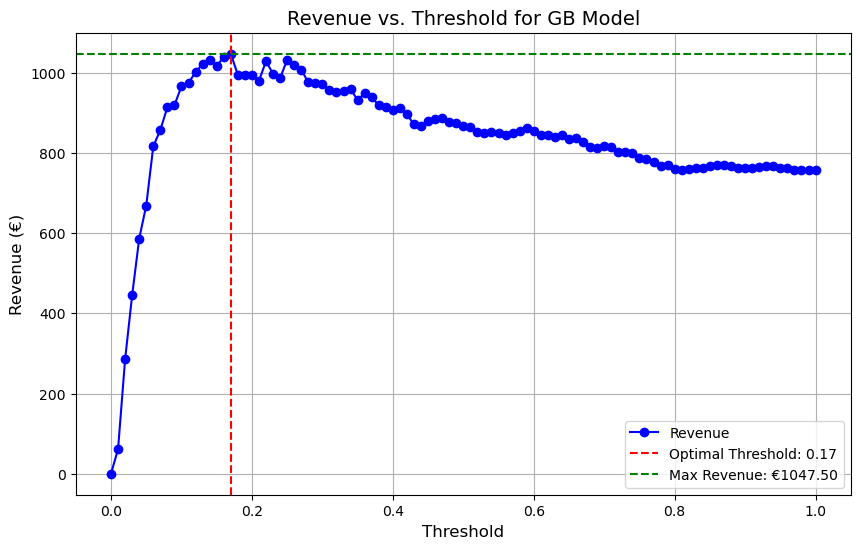

In [75]:

gb_best_model = joblib.load("Output/best_model_GB.joblib")


y_prob_gb = gb_best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

best_threshold_gb = 0
best_revenue_gb = float('-inf')

thresholds_gb = np.linspace(0, 1, 101)  # All possible thresholds
revenues_gb = []

# Calculate revenue for each threshold
for threshold_gb in thresholds_gb:
    y_pred_threshold_gb = (y_prob_gb >= threshold_gb).astype(int)
    
    _, _, revenue_gb = custom_revenue_metric(y_test, y_pred_threshold_gb)
    revenues_gb.append(revenue_gb)
    
    if revenue_gb > best_revenue_gb:
        best_revenue_gb = revenue_gb
        best_threshold_gb = threshold_gb

print(f"\nOptimal Threshold: {best_threshold_gb:.2f}")
print(f"Maximum Revenue with Optimal Threshold: €{best_revenue_gb:.2f}")

y_pred_final_gb = (y_prob_gb >= best_threshold_gb).astype(int)

# Final revenue
_, _, final_revenue_threshold_gb = custom_revenue_metric(y_test, y_pred_final_gb)
print(f"\nFinal Revenue with Optimal Threshold: €{final_revenue_threshold_gb:.2f}")

# Final metrics
accuracy_final_gb = accuracy_score(y_test, y_pred_final_gb)
print(f"\nAccuracy (on test set with threshold): {accuracy_final_gb:.3f}")
print("\nClassification Report (with threshold):")
print(classification_report(y_test, y_pred_final_gb, zero_division=0))

cm_threshold_gb = confusion_matrix(y_test, y_pred_final_gb)

# Display updated confusion matrix
disp_threshold_gb = ConfusionMatrixDisplay(confusion_matrix=cm_threshold_gb, display_labels=gb_best_model.classes_)
disp_threshold_gb.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for GB Model with Optimal Threshold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the revenue vs. threshold graph
plt.figure(figsize=(10, 6))
plt.plot(thresholds_gb, revenues_gb, marker='o', linestyle='-', color='b', label='Revenue')
plt.axvline(best_threshold_gb, color='r', linestyle='--', label=f'Optimal Threshold: {best_threshold_gb:.2f}')
plt.axhline(best_revenue_gb, color='g', linestyle='--', label=f'Max Revenue: €{best_revenue_gb:.2f}')

# Add labels, title, and legend
plt.title('Revenue vs. Threshold for GB Model', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Revenue (€)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

The Gradient Boosting model, with the best parameters of 198 estimators, a maximum depth of 10, a learning rate of 0.19, a minimum of 7 samples to split a node, and 11 samples per leaf, achieved a maximum revenue of €1047.50 at an optimal threshold of 0.17.

# 6.5  AdaBoost 

In [150]:
# Import necessary libraries
import os
import json
import joblib
import optuna
from optuna.samplers import TPESampler
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# Adaboost
def objective_ab(trial):
    # Suggest hyperparameters for AdaBoost
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 1.0, log=True)

    # Instantiate the AdaBoost model
    ab = AdaBoostClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=451
    )

    ab.fit(X_train, y_train)

    y_pred_ab = ab.predict(X_test)

    _, _, net_revenue = custom_revenue_metric(y_test, y_pred_ab)

    return net_revenue

# Seet seed for study
sampler_ab = TPESampler(seed=444)# For reproducibility
study_ab = optuna.create_study(direction='maximize', sampler=sampler_ab)
study_ab.optimize(objective_ab, n_trials=35)

print("Best Parameters (AdaBoost):", study_ab.best_params)
print("Best Net Revenue (AdaBoost):", study_ab.best_value)

ab_best_params = study_ab.best_params
ab_best_model = AdaBoostClassifier(
    **ab_best_params,
    random_state=42
)
ab_best_model.fit(X_train, y_train)

y_pred_ab = ab_best_model.predict(X_test)
total_gain_ab, total_loss_ab, final_revenue_ab = custom_revenue_metric(y_test, y_pred_ab)

print(f"\nTotal Money Won (AdaBoost): €{total_gain_ab:.2f}")
print(f"Total Money Lost (AdaBoost): €{total_loss_ab:.2f}")
print(f"Net Revenue (AdaBoost): €{final_revenue_ab:.2f}")

accuracy_ab = accuracy_score(y_test, y_pred_ab)
print(f"\nAccuracy (on test set, AdaBoost): {accuracy_ab:.3f}")
print("\nClassification Report (AdaBoost):")
print(classification_report(y_test, y_pred_ab, zero_division=0))

os.makedirs("Output", exist_ok=True)

model_path_ab = "Output/best_model_AB.joblib"
joblib.dump(ab_best_model, model_path_ab)
print(f"\nBest AdaBoost model saved at '{model_path_ab}'.")

study_path_ab = "Output/study_AB.joblib"
joblib.dump(study_ab, study_path_ab)
print(f"Complete AdaBoost study saved at '{study_path_ab}'.")

[I 2025-01-17 12:27:21,683] A new study created in memory with name: no-name-e761ff39-5057-42c6-8c3e-8865260c9dd6
c:\Users\inven\anaconda3\envs\master\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

[I 2025-01-17 12:27:31,090] Trial 0 finished with value: 825.0 and parameters: {'n_estimators': 428, 'learning_rate': 0.43912678701208896}. Best is trial 0 with value: 825.0.
c:\Users\inven\anaconda3\envs\master\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.

[I 2025-01-17 12:27:38,907] Trial 1 finished with value: 795.0 and parameters: {'n_estimators': 339, 'learning_rate': 0.2159957652787864}. Best is trial 0 with value: 825.0.
c:\Users\inven\anaconda3\envs\master\Lib\site-pac

Best Parameters (AdaBoost): {'n_estimators': 456, 'learning_rate': 0.9731894493352643}
Best Net Revenue (AdaBoost): 843.75

Total Money Won (AdaBoost): €6533.75
Total Money Lost (AdaBoost): €-5690.00
Net Revenue (AdaBoost): €843.75

Accuracy (on test set, AdaBoost): 0.812

Classification Report (AdaBoost):
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      5310
           1       0.31      0.03      0.06      1176

    accuracy                           0.81      6486
   macro avg       0.57      0.51      0.48      6486
weighted avg       0.73      0.81      0.74      6486


Best AdaBoost model saved at 'Output/best_model_AB.joblib'.
Complete AdaBoost study saved at 'Output/study_AB.joblib'.

Process completed (AdaBoost).


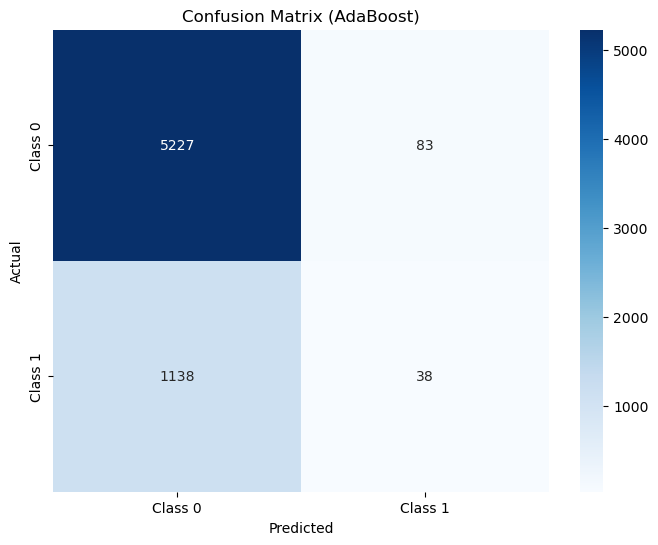

In [77]:

ab_best_model = joblib.load("Output/best_model_AB.joblib")

y_pred_ab = ab_best_model.predict(X_test)
conf_matrix_ab = confusion_matrix(y_test, y_pred_ab)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ab, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (AdaBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Optimal Threshold: 0.50
Maximum Revenue with Optimal Threshold: €843.75

Final Revenue with Optimal Threshold: €843.75

Accuracy (on test set with threshold): 0.812

Classification Report (with threshold):
              precision    recall  f1-score   support

           0       0.82      0.98      0.90      5310
           1       0.31      0.03      0.06      1176

    accuracy                           0.81      6486
   macro avg       0.57      0.51      0.48      6486
weighted avg       0.73      0.81      0.74      6486



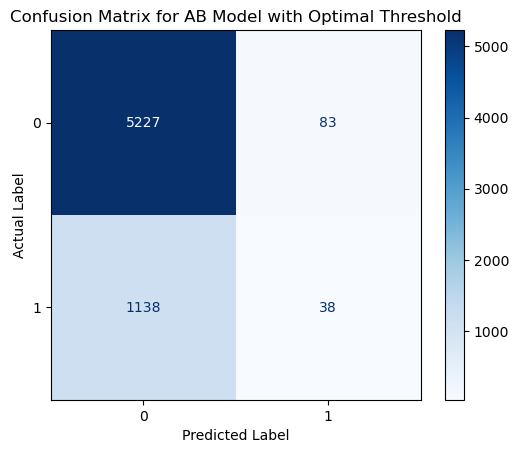

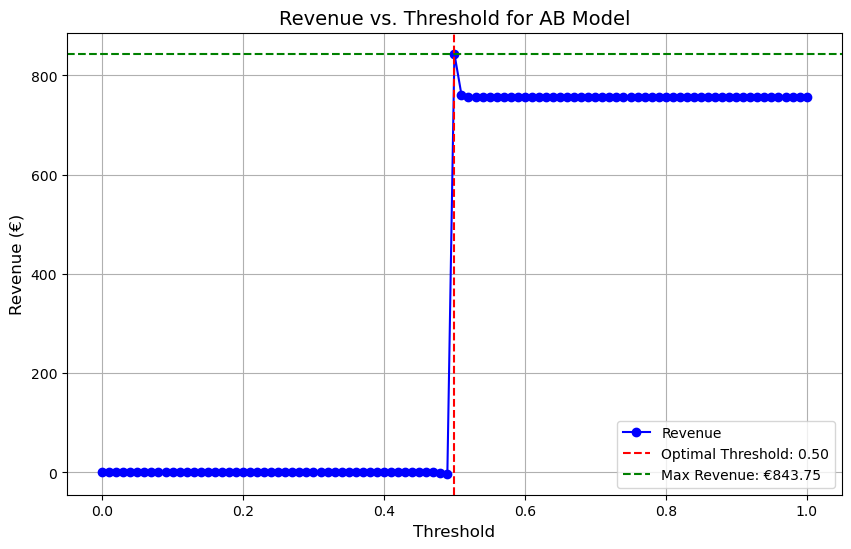

In [79]:
# ab_best_model

y_prob_ab = ab_best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

best_threshold_ab = 0
best_revenue_ab = float('-inf')

thresholds_ab = np.linspace(0, 1, 101)  # All possible thresholds
revenues_ab = []

# Calculate revenue for each threshold
for threshold_ab in thresholds_ab:
    y_pred_threshold_ab = (y_prob_ab >= threshold_ab).astype(int)
    
    _, _, revenue_ab = custom_revenue_metric(y_test, y_pred_threshold_ab)
    revenues_ab.append(revenue_ab)
    
    if revenue_ab > best_revenue_ab:
        best_revenue_ab = revenue_ab
        best_threshold_ab = threshold_ab

print(f"\nOptimal Threshold: {best_threshold_ab:.2f}")
print(f"Maximum Revenue with Optimal Threshold: €{best_revenue_ab:.2f}")

y_pred_final_ab = (y_prob_ab >= best_threshold_ab).astype(int)

# Final revenue
_, _, final_revenue_threshold_ab = custom_revenue_metric(y_test, y_pred_final_ab)
print(f"\nFinal Revenue with Optimal Threshold: €{final_revenue_threshold_ab:.2f}")

# Final metrics
accuracy_final_ab = accuracy_score(y_test, y_pred_final_ab)
print(f"\nAccuracy (on test set with threshold): {accuracy_final_ab:.3f}")
print("\nClassification Report (with threshold):")
print(classification_report(y_test, y_pred_final_ab, zero_division=0))

cm_threshold_ab = confusion_matrix(y_test, y_pred_final_ab)

# Display updated confusion matrix
disp_threshold_ab = ConfusionMatrixDisplay(confusion_matrix=cm_threshold_ab, display_labels=ab_best_model.classes_)
disp_threshold_ab.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for AB Model with Optimal Threshold")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

# Plot the revenue vs. threshold graph
plt.figure(figsize=(10, 6))
plt.plot(thresholds_ab, revenues_ab, marker='o', linestyle='-', color='b', label='Revenue')
plt.axvline(best_threshold_ab, color='r', linestyle='--', label=f'Optimal Threshold: {best_threshold_ab:.2f}')
plt.axhline(best_revenue_ab, color='g', linestyle='--', label=f'Max Revenue: €{best_revenue_ab:.2f}')

# Add labels, title, and legend
plt.title('Revenue vs. Threshold for AB Model', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Revenue (€)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

The AdaBoost model, with the best parameters of 456 estimators and a learning rate of 0.973, achieved a maximum revenue of €843.75 at an optimal threshold of 0.50. When compared to Gradient Boosting (€1047.50) and Random Forest (€1615.00), AdaBoost underperforms in terms of maximizing revenue.

# 6.6 XGBoost 

In [153]:
# Import necessary libraries
import os
import json
import joblib
import optuna
from optuna.samplers import TPESampler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

def objective_xgb(trial):
    # Suggest hyperparameters for XGBoost
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    gamma = trial.suggest_float('gamma', 0, 5)

    # Instantiate the XGBoost model
    xgb = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        gamma=gamma,
        random_state=42,
        eval_metric='logloss'
    )

    # Train on training data
    xgb.fit(X_train, y_train)

    # Predict on test data
    y_pred_xgb = xgb.predict(X_test)

    # Calculate the revenue metric
    _, _, net_revenue = custom_revenue_metric(y_test, y_pred_xgb)

    # Optuna will maximize net_revenue
    return net_revenue

#
sampler_xgb = TPESampler(seed=448)  # For reproducibility
study_xgb = optuna.create_study(direction='maximize', sampler=sampler_xgb)
study_xgb.optimize(objective_xgb, n_trials=50)

print("Best Parameters (XGBoost):", study_xgb.best_params)
print("Best Net Revenue (XGBoost):", study_xgb.best_value)

# 
xgb_best_params = study_xgb.best_params
xgb_best_model = XGBClassifier(
    **xgb_best_params,
    random_state=415,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_best_model.fit(X_train, y_train)

# 
y_pred_xgb = xgb_best_model.predict(X_test)
total_gain_xgb, total_loss_xgb, final_revenue_xgb = custom_revenue_metric(y_test, y_pred_xgb)

print(f"\nTotal Money Won (XGBoost): €{total_gain_xgb:.2f}")
print(f"Total Money Lost (XGBoost): €{total_loss_xgb:.2f}")
print(f"Net Revenue (XGBoost): €{final_revenue_xgb:.2f}")

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"\nAccuracy (on test set, XGBoost): {accuracy_xgb:.3f}")
print("\nClassification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# 
os.makedirs("output", exist_ok=True)

model_path_xgb = "Output/best_model_XGB.joblib"
joblib.dump(xgb_best_model, model_path_xgb)
print(f"\nBest XGBoost model saved at '{model_path_xgb}'.")

study_path_xgb = "Output/study_XGB.joblib"
joblib.dump(study_xgb, study_path_xgb)
print(f"Complete XGBoost study saved at '{study_path_xgb}'.")

[I 2025-01-17 12:32:10,449] A new study created in memory with name: no-name-0f91b30c-a6a9-4a7e-bc54-40394624d0af
[I 2025-01-17 12:32:11,491] Trial 0 finished with value: 947.5 and parameters: {'n_estimators': 310, 'max_depth': 42, 'learning_rate': 0.2383122521896866, 'colsample_bytree': 0.8795596998600337, 'subsample': 0.5762097483384737, 'gamma': 0.6480876179105277}. Best is trial 0 with value: 947.5.
[I 2025-01-17 12:32:12,577] Trial 1 finished with value: 810.0 and parameters: {'n_estimators': 403, 'max_depth': 34, 'learning_rate': 0.012022179637894087, 'colsample_bytree': 0.970025792653864, 'subsample': 0.7060024478848517, 'gamma': 3.2276479745494275}. Best is trial 0 with value: 947.5.
[I 2025-01-17 12:32:12,882] Trial 2 finished with value: 806.25 and parameters: {'n_estimators': 98, 'max_depth': 14, 'learning_rate': 0.042865534045032384, 'colsample_bytree': 0.9394097111791123, 'subsample': 0.9114417644391062, 'gamma': 2.800624626214697}. Best is trial 0 with value: 947.5.
[I 20

Best Parameters (XGBoost): {'n_estimators': 315, 'max_depth': 44, 'learning_rate': 0.16232066150875032, 'colsample_bytree': 0.9608841764953153, 'subsample': 0.520627897813298, 'gamma': 0.7313512832294011}
Best Net Revenue (XGBoost): 1025.0

Total Money Won (XGBoost): €6350.00
Total Money Lost (XGBoost): €-5400.00
Net Revenue (XGBoost): €950.00

Accuracy (on test set, XGBoost): 0.798

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      5310
           1       0.29      0.08      0.13      1176

    accuracy                           0.80      6486
   macro avg       0.56      0.52      0.51      6486
weighted avg       0.73      0.80      0.75      6486


Best XGBoost model saved at 'Output/best_model_XGB.joblib'.
Complete XGBoost study saved at 'Output/study_XGB.joblib'.

Process completed (XGBoost).


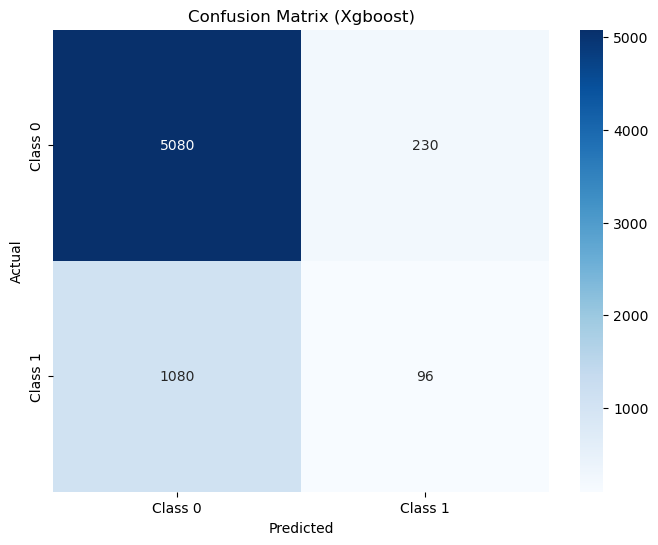

In [82]:

xgb_best_model = joblib.load("Output/best_model_XGB.joblib")

y_pred_xgb = xgb_best_model.predict(X_test)

conf_matrix_XG= confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_XG, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix (Xgboost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Optimal Threshold: 0.17
Maximum Revenue with Optimal Threshold: €1135.00

Final Revenue with Optimal Threshold: €1135.00

Accuracy (on test set with threshold): 0.671

Classification Report (with threshold):
              precision    recall  f1-score   support

           0       0.84      0.74      0.79      5310
           1       0.23      0.36      0.28      1176

    accuracy                           0.67      6486
   macro avg       0.54      0.55      0.53      6486
weighted avg       0.73      0.67      0.70      6486



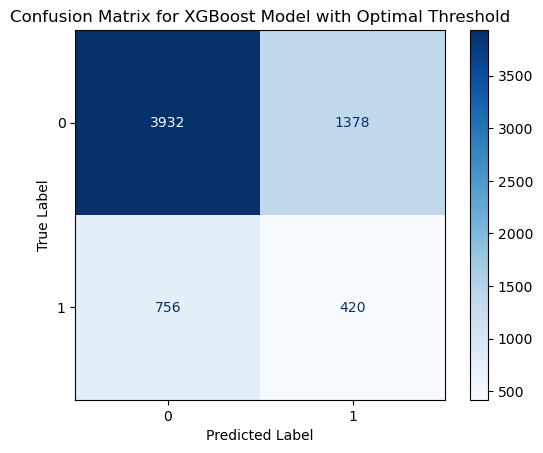

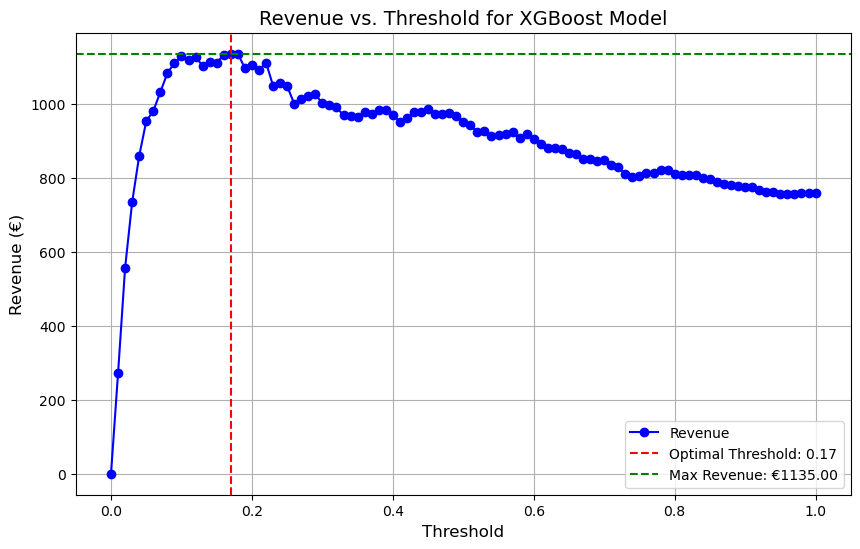

In [83]:
# xgb_best_model

y_prob_xgb = xgb_best_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

best_threshold_xgb = 0
best_revenue_xgb = float('-inf')

thresholds_xgb = np.linspace(0, 1, 101)  # All possible thresholds
revenues_xgb = []

# Calculate revenue for each threshold
for threshold_xgb in thresholds_xgb:
    y_pred_threshold_xgb = (y_prob_xgb >= threshold_xgb).astype(int)
    
    _, _, revenue_xgb = custom_revenue_metric(y_test, y_pred_threshold_xgb)
    revenues_xgb.append(revenue_xgb)
    
    if revenue_xgb > best_revenue_xgb:
        best_revenue_xgb = revenue_xgb
        best_threshold_xgb = threshold_xgb

print(f"\nOptimal Threshold: {best_threshold_xgb:.2f}")
print(f"Maximum Revenue with Optimal Threshold: €{best_revenue_xgb:.2f}")

y_pred_final_xgb = (y_prob_xgb >= best_threshold_xgb).astype(int)

# Final revenue
_, _, final_revenue_threshold_xgb = custom_revenue_metric(y_test, y_pred_final_xgb)
print(f"\nFinal Revenue with Optimal Threshold: €{final_revenue_threshold_xgb:.2f}")

# Final metrics
accuracy_final_xgb = accuracy_score(y_test, y_pred_final_xgb)
print(f"\nAccuracy (on test set with threshold): {accuracy_final_xgb:.3f}")
print("\nClassification Report (with threshold):")
print(classification_report(y_test, y_pred_final_xgb, zero_division=0))

cm_threshold_xgb = confusion_matrix(y_test, y_pred_final_xgb)


# Display updated confusion matrix
disp_threshold_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_threshold_xgb, display_labels=xgb_best_model.classes_)
disp_threshold_xgb.plot(cmap=plt.cm.Blues)

plt.title("Confusion Matrix for XGBoost Model with Optimal Threshold")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Plot the revenue vs. threshold graph
plt.figure(figsize=(10, 6))
plt.plot(thresholds_xgb, revenues_xgb, marker='o', linestyle='-', color='b', label='Revenue')
plt.axvline(best_threshold_xgb, color='r', linestyle='--', label=f'Optimal Threshold: {best_threshold_xgb:.2f}')
plt.axhline(best_revenue_xgb, color='g', linestyle='--', label=f'Max Revenue: €{best_revenue_xgb:.2f}')

# Add labels, title, and legend
plt.title('Revenue vs. Threshold for XGBoost Model', fontsize=14)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Revenue (€)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

The XGBoost model, optimized with 315 estimators, a maximum depth of 44, a learning rate of 0.162, a colsample_bytree of 0.961, a subsample of 0.521, and a gamma value of 0.731, achieved a maximum revenue of €1135.00 at an optimal threshold of 0.17.

## 7. Results

### 7.1 Models with no grid search 

                 Model  Accuracy  Class 1 Detection  Net Revenue (€)
0        Random Forest  0.810669           0.025510           805.00
1    Gradient Boosting  0.818070           0.015306           820.00
2             AdaBoost  0.803269           0.039966           808.75
3              XGBoost  0.807740           0.053571           905.00
4  K-Nearest Neighbors  0.791243           0.055272           778.75
5       Voucher System  0.818686           0.000000           757.50


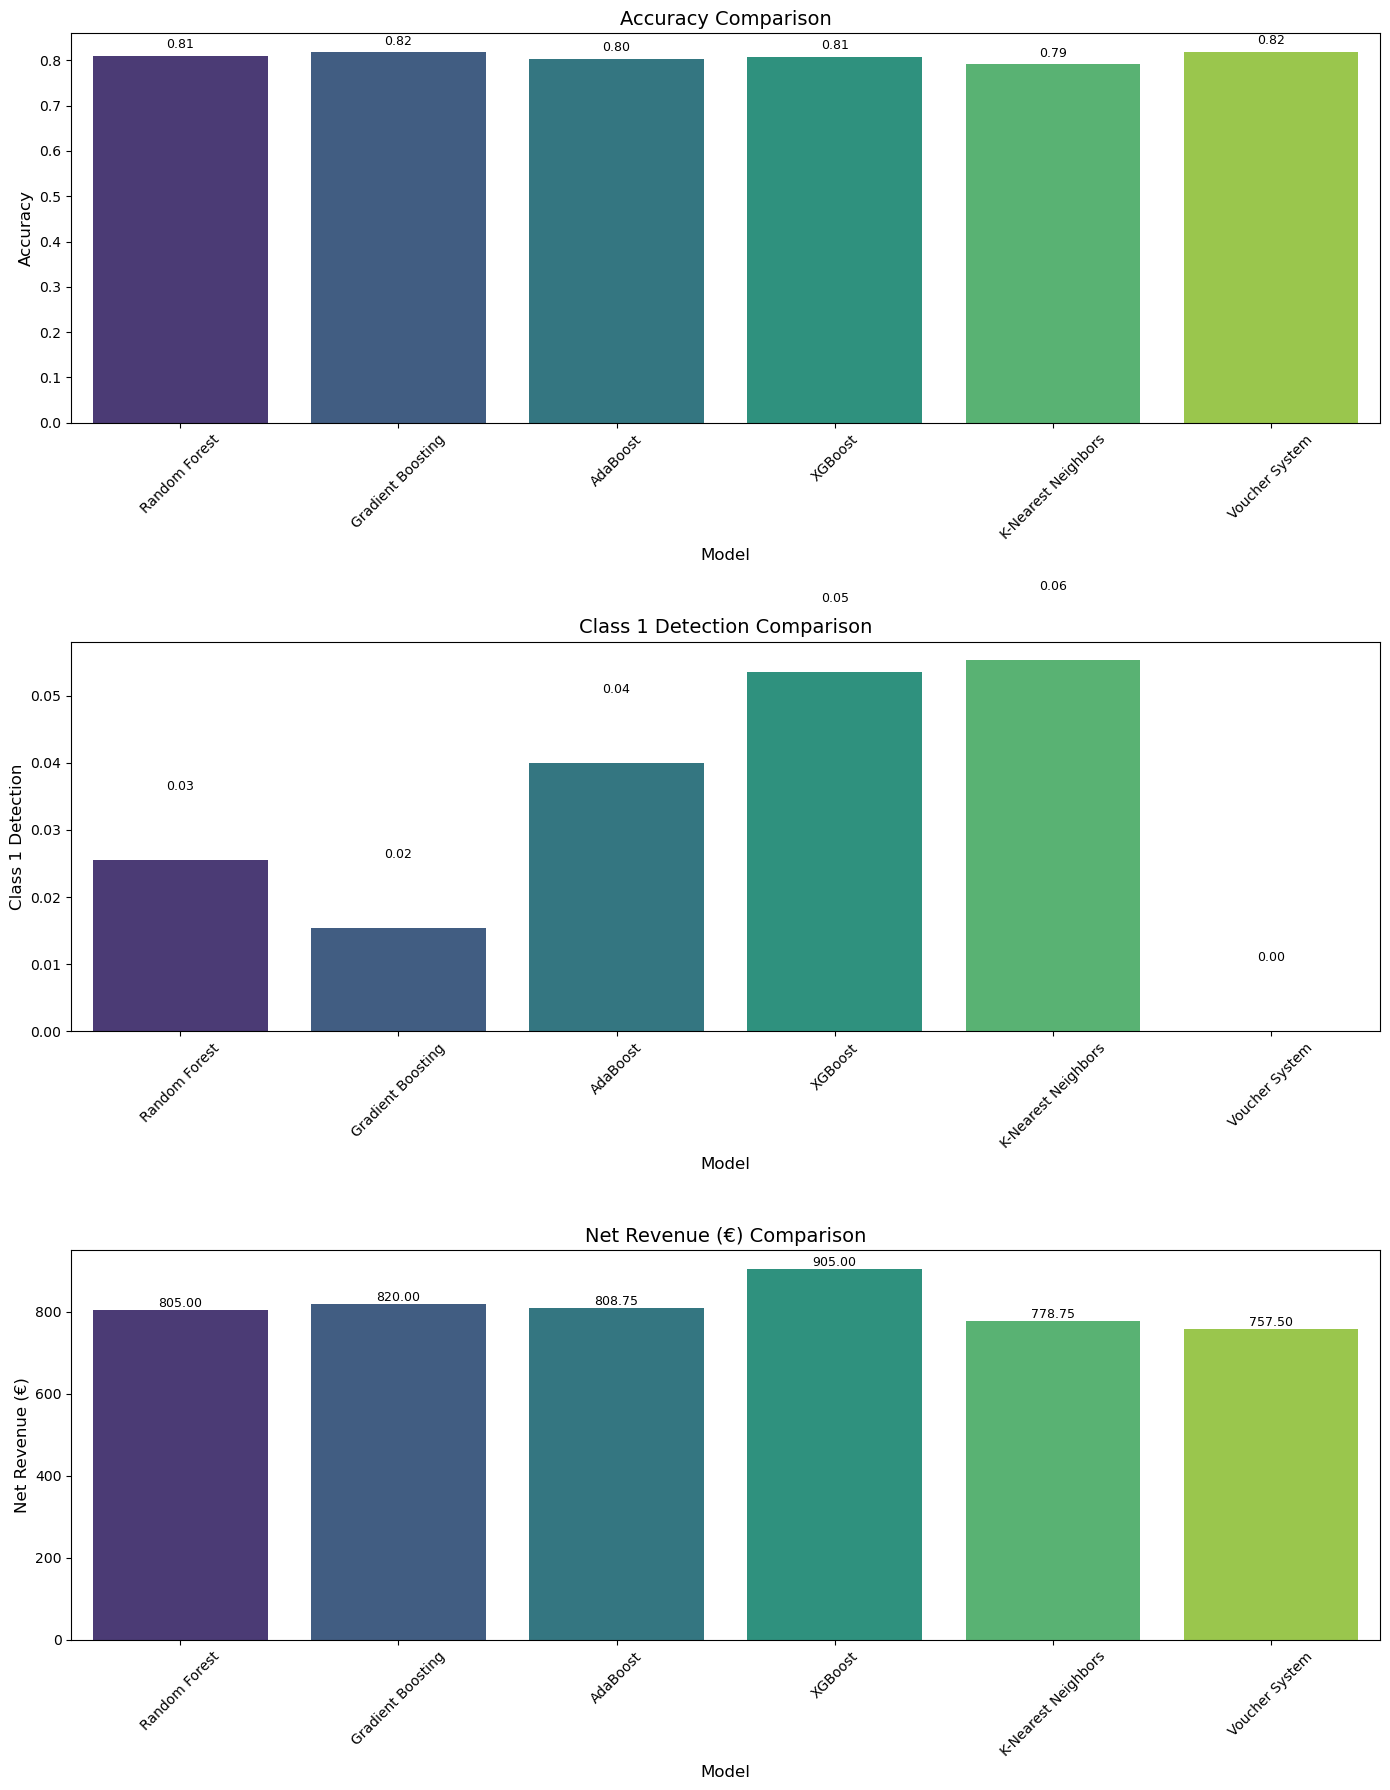

In [156]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, recall_score

# Import classifiers for baseline (naked) models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier  

# Data preparation
X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# Custom revenue metric function
def custom_revenue_metric(y_true, y_pred):
    tn_gain = 1.25  
    fn_loss = -5

    true_negatives = ((y_true == 0) & (y_pred == 0)).sum()
    false_negatives = ((y_true == 1) & (y_pred == 0)).sum()

    total_gain = true_negatives * tn_gain
    total_loss = false_negatives * fn_loss
    net_revenue = total_gain + total_loss

    return total_gain, total_loss, net_revenue

# Instantiate baseline models (naked models) with default parameters
models = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# List to store evaluation results for each model
results = []

# Train each model, predict using default settings, and calculate metrics
for model_name, model in models.items():
    # Train the model on training data
    model.fit(X_train, y_train)
    
    # Obtain predictions using the model's default prediction method
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    # "Class 1 Detection" is defined as the recall for the positive class
    class1_detection = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    _, _, net_revenue = custom_revenue_metric(y_test, y_pred)
    
    # Append the results for this model
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Class 1 Detection": class1_detection,
        "Net Revenue (€)": net_revenue
    })

# In this system, every prediction is 0
voucher_pred = np.zeros(len(y_test), dtype=int)  # Predict 0 for everyone
voucher_accuracy = accuracy_score(y_test, voucher_pred)
voucher_class1_detection = recall_score(y_test, voucher_pred, pos_label=1, zero_division=0)
_, _, voucher_net_revenue = custom_revenue_metric(y_test, voucher_pred)

results.append({
    "Model": "Voucher System",
    "Accuracy": voucher_accuracy,
    "Class 1 Detection": voucher_class1_detection,
    "Net Revenue (€)": voucher_net_revenue
})

# Convert results to a DataFrame and display them
results_df = pd.DataFrame(results)
print(results_df)

# Create separate bar plots for each evaluation metric: Accuracy, Class 1 Detection, and Net Revenue
metrics = ["Accuracy", "Class 1 Detection", "Net Revenue (€)"]
plt.figure(figsize=(14, 6 * len(metrics)))

for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 1, i)
    ax = sns.barplot(data=results_df, x="Model", y=metric, palette="viridis")
    
    # Annotate each bar with its corresponding metric value
    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height() + 0.01,
            f"{p.get_height():.2f}",
            ha="center", va="bottom", fontsize=9
        )
    
    plt.title(f"{metric} Comparison", fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Model", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The comparison shows that the machine learning models (Random Forest, Gradient Boosting, AdaBoost, XGBoost, and K-Nearest Neighbors) perform poorly in detecting Class 1 (customers who buy again) compared to the Voucher System, which simply classifies everyone as Class 0 (non-repeat buyers). While the Voucher System achieves zero Class 1 detections, it matches or exceeds most models in net revenue and accuracy, highlighting the models' limited ability to differentiate repeat buyers effectively. This suggests that the models fail to provide a significant advantage over the simplistic baseline classification approach.

### 7.2 Comparison of All Optimized Models with Best Hyperparameters

                 Model  Accuracy  Class 1 Detection  Net Revenue (€)  \
0        Random Forest  0.646469           0.511054          1615.00   
1    Gradient Boosting  0.660191           0.357143          1047.50   
2             AdaBoost  0.811748           0.032313           843.75   
3              XGBoost  0.670984           0.357143          1135.00   
4  K-Nearest Neighbors  0.757940           0.136905           868.75   
5       Voucher System  0.818686           0.000000           757.50   

   Best Threshold  
0            0.50  
1            0.17  
2            0.50  
3            0.17  
4            0.28  
5             NaN  


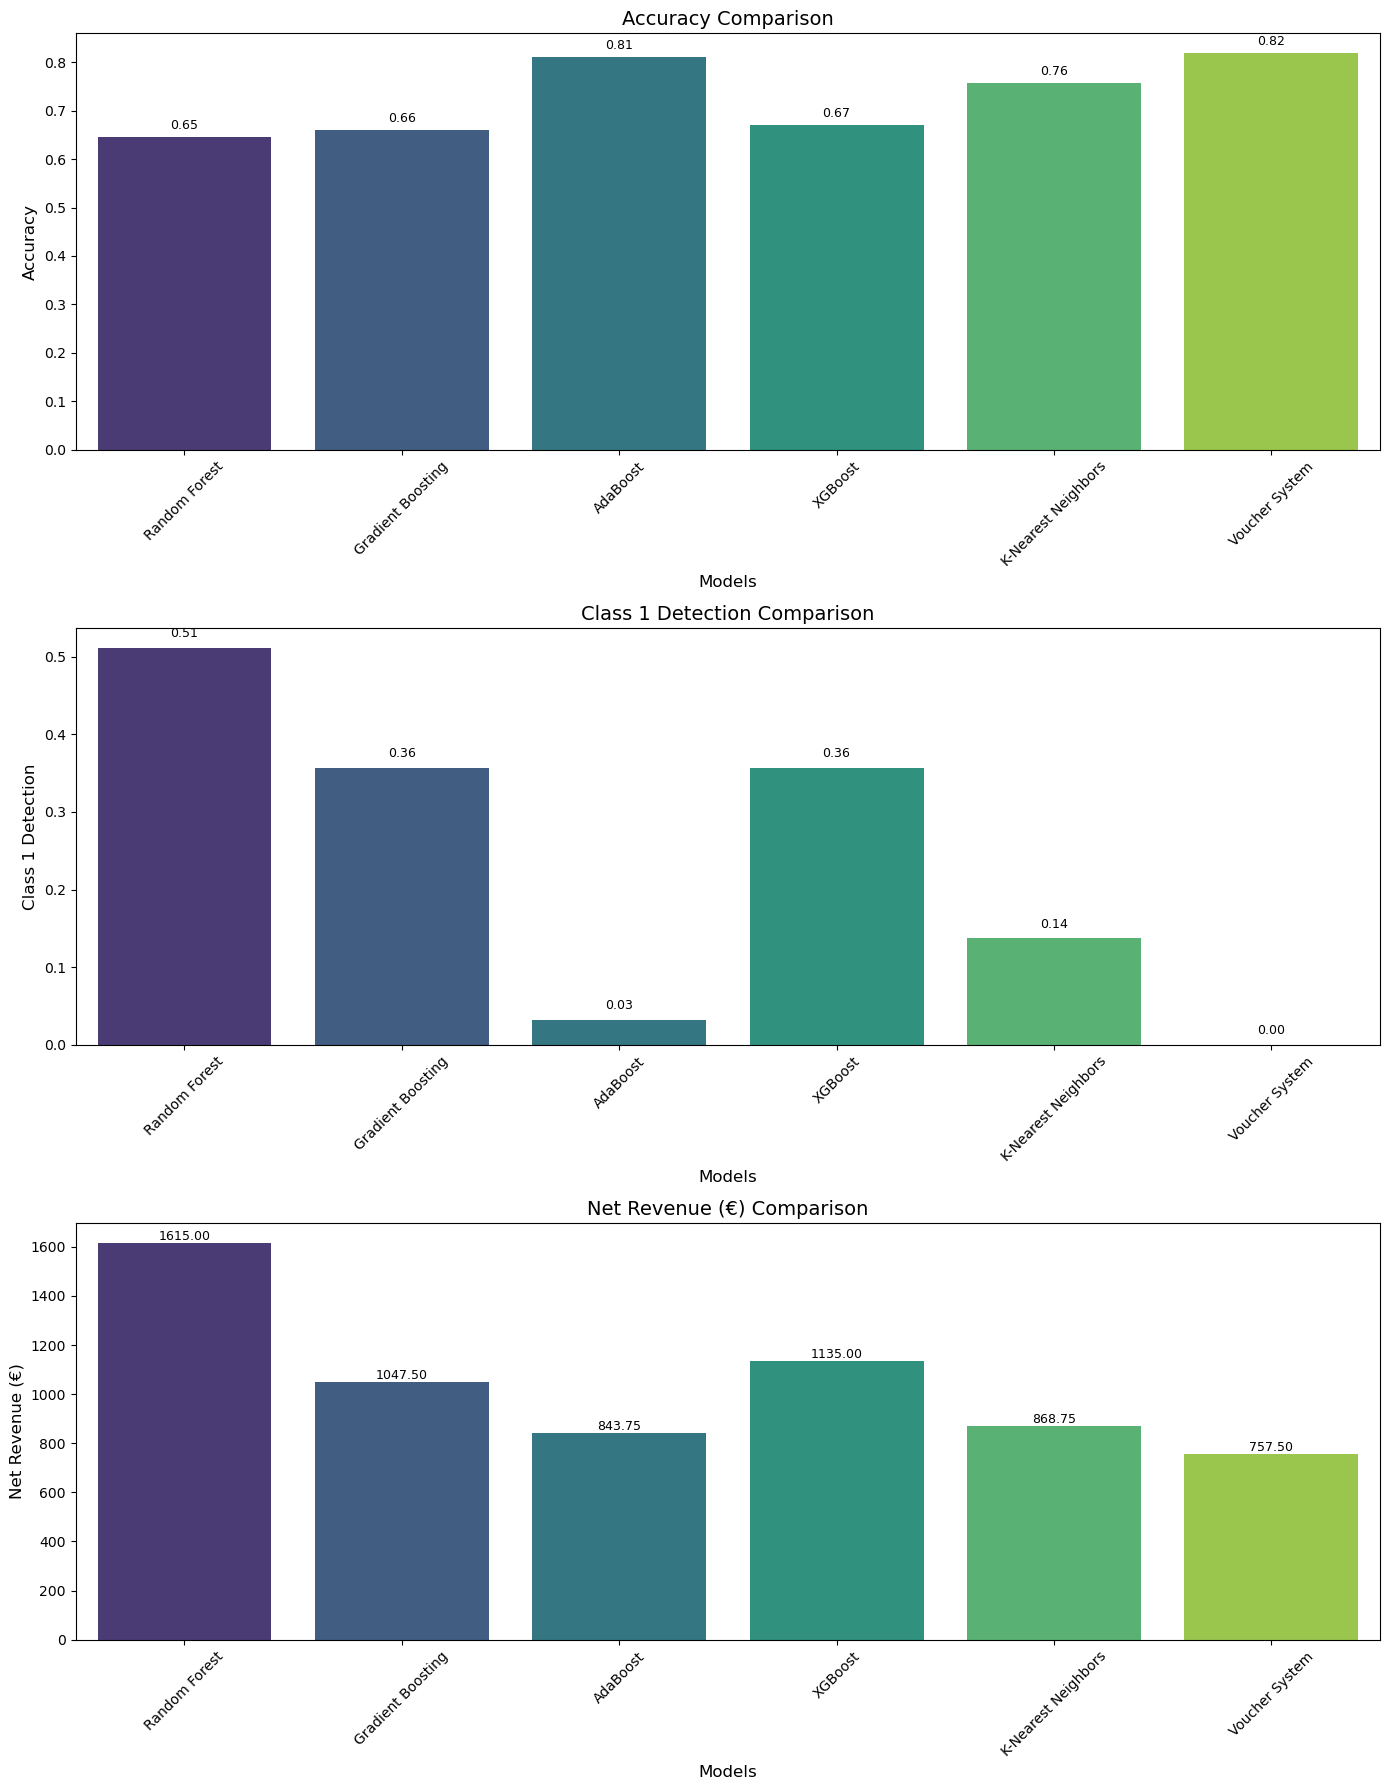

In [157]:
# Import necessary libraries
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# Data preparation
X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# Custom revenue metric function
def custom_revenue_metric(y_true, y_pred):
    tn_gain = 1.25 
    fp_loss = -5 

    true_negatives = (y_true == 0) & (y_pred == 0)
    false_negatives = (y_true == 1) & (y_pred == 0)

    total_gain = true_negatives.sum() * tn_gain
    total_loss = false_negatives.sum() * fp_loss
    net_revenue = total_gain + total_loss

    return total_gain, total_loss, net_revenue

# Function to calculate best threshold for a given model
def calculate_best_threshold(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    best_threshold = 0
    best_revenue = float('-inf')
    thresholds = np.linspace(0, 1, 101)
    
    for threshold in thresholds:
        y_pred_threshold = (y_prob >= threshold).astype(int)
        _, _, revenue = custom_revenue_metric(y_test, y_pred_threshold)
        if revenue > best_revenue:
            best_revenue = revenue
            best_threshold = threshold
            
    return best_threshold

# List of model file paths and names
model_files = {
    "Random Forest": "Output/best_model_RF.joblib",
    "Gradient Boosting": "Output/best_model_GB.joblib",
    "AdaBoost": "Output/best_model_AB.joblib",
    "XGBoost": "Output/best_model_XGB.joblib",
    "K-Nearest Neighbors": "Output/best_model_KNN.joblib"
}

# Dictionary to store evaluation results
results = []

# Load each model, evaluate (using best threshold), and collect metrics
for model_name, file_path in model_files.items():
    # Load the model
    model = joblib.load(file_path)
    
    # Calculate best threshold (based on max net revenue)
    best_threshold = calculate_best_threshold(model, X_test, y_test)
    
    # Predict on the test set using the best threshold
    y_prob = model.predict_proba(X_test)[:, 1]
    y_pred = (y_prob >= best_threshold).astype(int)
    
    # Compute metrics:
    accuracy = accuracy_score(y_test, y_pred)
    # Class 1 detection is defined as the recall on the positive class
    class1_detection = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
    _, _, net_revenue = custom_revenue_metric(y_test, y_pred)
    
    # Append results
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Class 1 Detection": class1_detection,
        "Net Revenue (€)": net_revenue,
        "Best Threshold": best_threshold
    })

# In this system, every prediction is 0
voucher_pred = np.zeros(len(y_test), dtype=int)
voucher_accuracy = accuracy_score(y_test, voucher_pred)
voucher_class1_detection = recall_score(y_test, voucher_pred, pos_label=1, zero_division=0)
_, _, voucher_net_revenue = custom_revenue_metric(y_test, voucher_pred)

results.append({
    "Model": "Voucher System",
    "Accuracy": voucher_accuracy,
    "Class 1 Detection": voucher_class1_detection,
    "Net Revenue (€)": voucher_net_revenue,
    "Best Threshold": np.nan  
})

# Convert results to a DataFrame and display them
results_df = pd.DataFrame(results)
print(results_df)

# Create separate bar plots for each metric (Accuracy, Class 1 Detection, and Net Revenue)
metrics = ["Accuracy", "Class 1 Detection", "Net Revenue (€)"]
plt.figure(figsize=(14, 6 * len(metrics)))

for i, metric in enumerate(metrics, 1):
    plt.subplot(len(metrics), 1, i)
    ax = sns.barplot(data=results_df, x="Model", y=metric, hue="Model", dodge=False, palette="viridis", legend=False)
    
    # Add values on top of bars
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f"{bar.get_height():.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )
    
    plt.title(f"{metric} Comparison", fontsize=14)
    plt.ylabel(metric, fontsize=12)
    plt.xlabel("Models", fontsize=12)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The table compares the performance of various models in terms of accuracy, Class 1 detection, and net revenue. Random Forest achieves the highest net revenue (€1615.00) and excels in Class 1 detection (51.1%), making it particularly effective given that a false negative is four times more costly than a false positive. However, this comes at the expense of lower overall accuracy (0.646469), as the model prioritizes correctly identifying repeat buyers (Class 1). In contrast, models like AdaBoost trade off Class 1 detection for higher accuracy (0.811748), but this compromises their ability to address the costlier false negatives. The Voucher System provides competitive accuracy but fails entirely in Class 1 detection.


Random Forest is the optimal model for this task because it achieves the highest net revenue (€1615.00). Compared to the Voucher System, which generates €757.50 in net revenue by classifying all customers as non-repeat buyers, Random Forest is more than twice as effective. This demonstrates that focusing on minimizing false negatives while optimizing revenue makes Random Forest the most suitable choice for the company.


# 7.2.1. Full dataset 

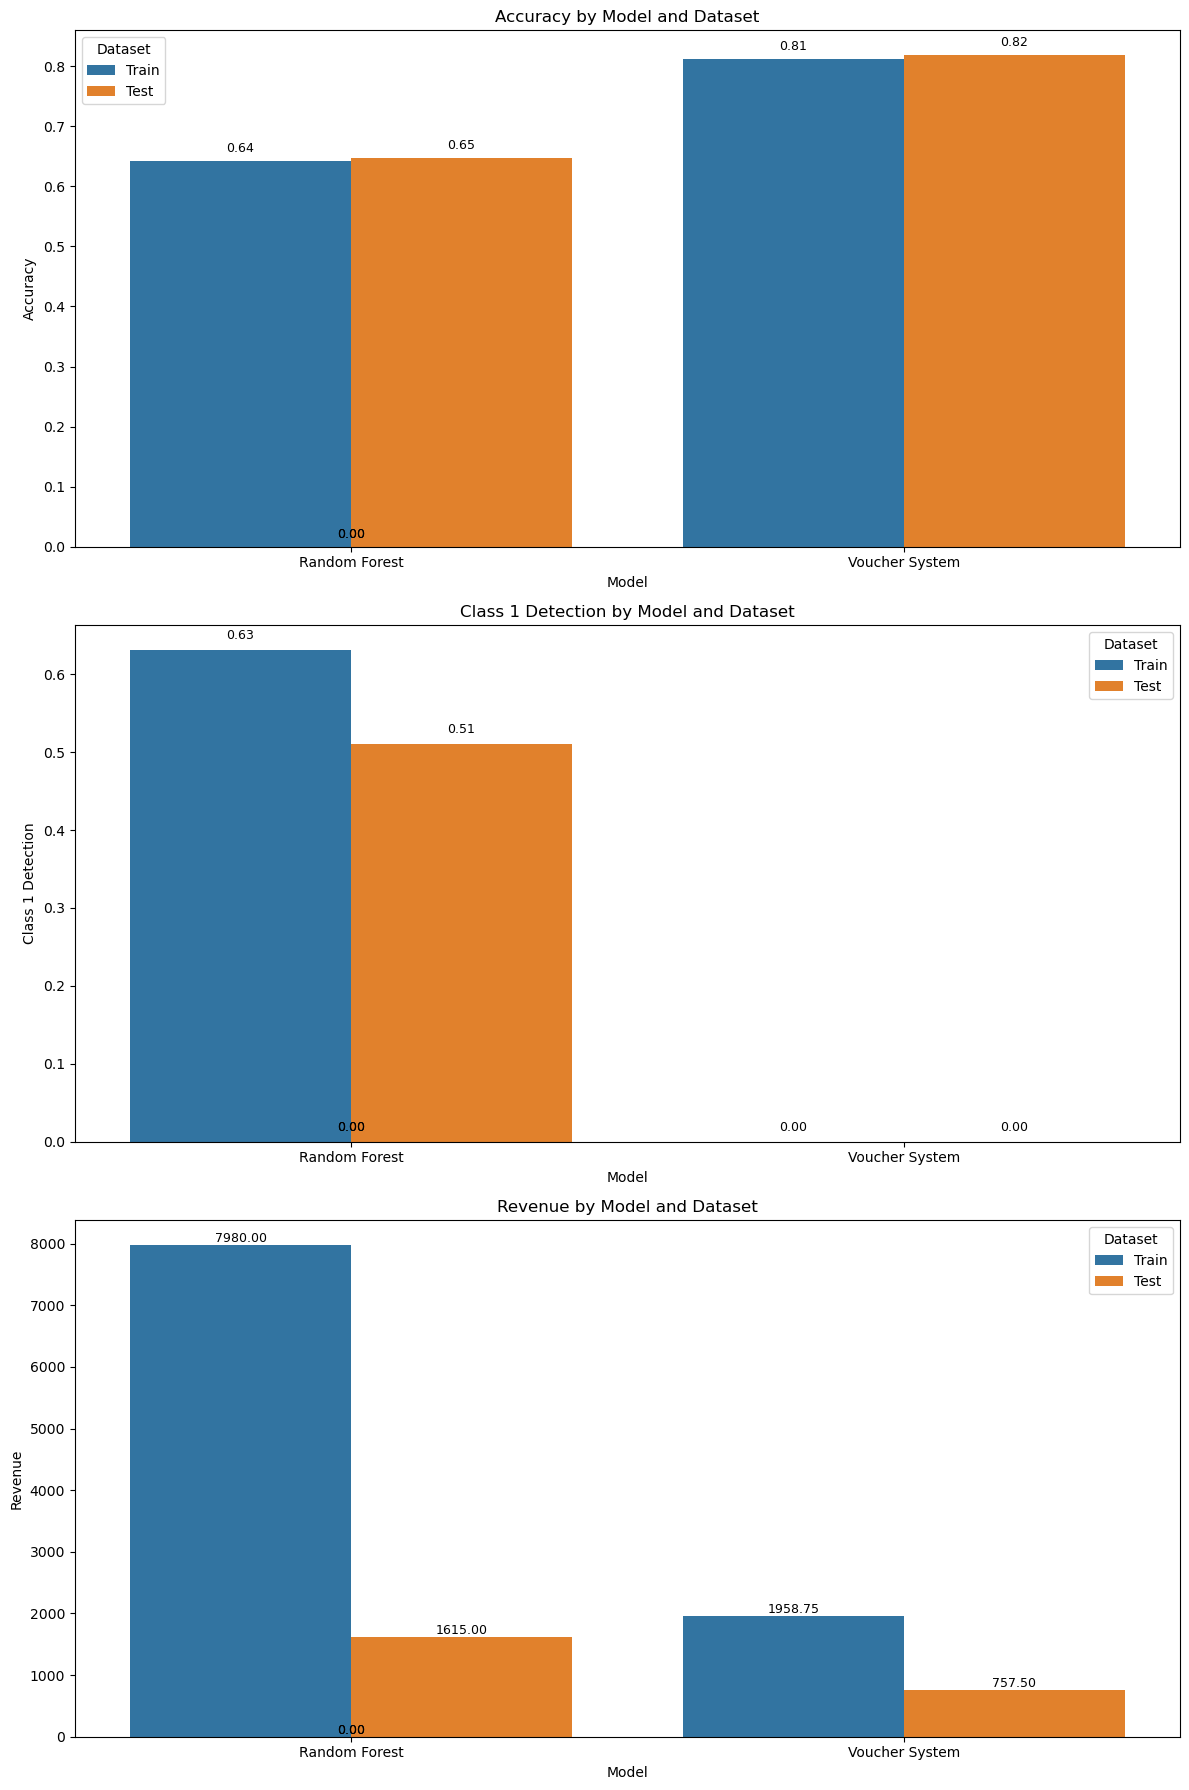

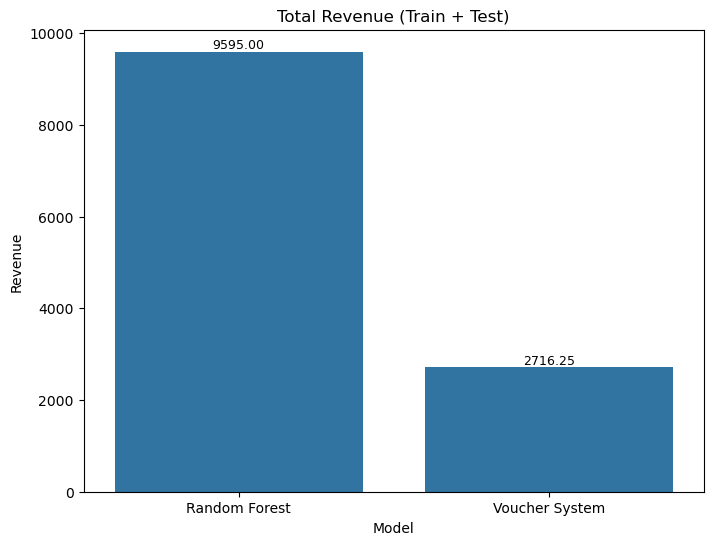

In [158]:
# Import necessary libraries
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, recall_score

# Data preparation
X_train = Train_finish_ohe.drop(columns=['target90', 'customernumber'])
y_train = Train_finish_ohe['target90']

X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# Custom revenue metric function
def custom_revenue_metric(y_true, y_pred):
    tn_gain = 1.25  
    fp_loss = -5

    true_negatives = (y_true == 0) & (y_pred == 0)
    false_negatives = (y_true == 1) & (y_pred == 0)

    total_gain = true_negatives.sum() * tn_gain
    total_loss = false_negatives.sum() * fp_loss
    net_revenue = total_gain + total_loss

    return total_gain, total_loss, net_revenue

# Load the Random Forest model
rf_model_path = "Output/best_model_RF.joblib"
model = joblib.load(rf_model_path)

# Predict probabilities for both datasets
y_train_prob = model.predict_proba(X_train)[:, 1]
y_test_prob = model.predict_proba(X_test)[:, 1]

# Define a function to calculate revenue and metrics for a dataset
def evaluate_set(y_true, y_prob):
    threshold = 0.5  # Fixed threshold
    y_pred = (y_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_true, y_pred)
    class1_detection = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
    _, _, revenue = custom_revenue_metric(y_true, y_pred)
    return accuracy, class1_detection, revenue

# Evaluate Random Forest on train and test sets
rf_train_metrics = evaluate_set(y_train, y_train_prob)
rf_test_metrics = evaluate_set(y_test, y_test_prob)

# Evaluate Voucher System on train and test sets
voucher_train_metrics = evaluate_set(y_train, np.zeros(len(y_train)))
voucher_test_metrics = evaluate_set(y_test, np.zeros(len(y_test)))

# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    "Set": ["Train", "Train", "Test", "Test"],
    "Model": ["Random Forest", "Voucher System", "Random Forest", "Voucher System"],
    "Accuracy": [rf_train_metrics[0], voucher_train_metrics[0], rf_test_metrics[0], voucher_test_metrics[0]],
    "Class 1 Detection": [rf_train_metrics[1], voucher_train_metrics[1], rf_test_metrics[1], voucher_test_metrics[1]],
    "Revenue": [rf_train_metrics[2], voucher_train_metrics[2], rf_test_metrics[2], voucher_test_metrics[2]]
})

# Plot accuracy, class 1 detection, and revenue by set
metrics = ["Accuracy", "Class 1 Detection", "Revenue"]
plt.figure(figsize=(12, 18))

for i, metric in enumerate(metrics, 1):
    plt.subplot(3, 1, i)
    ax = sns.barplot(data=metrics_df, x="Model", y=metric, hue="Set")
    plt.title(f"{metric} by Model and Dataset")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.legend(title="Dataset")

    # Add values on top of bars
    for bar in ax.patches:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f"{bar.get_height():.2f}",
            ha="center",
            va="bottom",
            fontsize=9
        )

plt.tight_layout()
plt.show()

# Plot the sum of revenue across train and test sets
revenue_summary = metrics_df.groupby("Model")["Revenue"].sum().reset_index()
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=revenue_summary, x="Model", y="Revenue")
plt.title("Total Revenue (Train + Test)")
plt.ylabel("Revenue")
plt.xlabel("Model")

# Add values on top of bars
for bar in ax.patches:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.01,
        f"{bar.get_height():.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.show()

## Comparison of Model Performance

### Accuracy
- **Random Forest**: Shows consistent accuracy on train (0.64) and test (0.65) datasets, indicating stable predictions across datasets.
- **Voucher System**: Performs better in accuracy, achieving 0.81 on train and 0.82 on test datasets, but lacks the ability to identify critical segments.

### Class 1 Detection
- **Random Forest**: Detects Class 1 customers with a train performance of 0.63 and a test performance of 0.51. This capability is crucial because Class 1 customers are likely to buy again and issuing a €5 coupon unnecessarily is costly.
- **Voucher System**: Fails to meaningfully detect Class 1 customers, making it unsuitable for a cost-efficient strategy.

### Revenue
- **Random Forest**: Demonstrates a significant revenue advantage:
  - Train: **€7,980**
  - Test: **€1,615**
  - Total: **€9,595**
- **Voucher System**: Generates lower revenue:
  - Train: **€1,958.75**
  - Test: **€757.50**
  - Total: **€2,716.25**

### Missed Revenue and Cost Implications
If the company relies solely on the Voucher System instead of Random Forest:
- They will lose **€6,878.75** in potential revenue (calculated as €9,595 - €2,716.25).
- This loss is **3.53 times higher** compared to the revenue generated by the Voucher System.

### Summary
The **Random Forest** model, despite slightly lower accuracy, is far more valuable for detecting customers who will buy again (Class 1). This capability prevents the company from overspending on unnecessary coupons while significantly increasing revenue. The **Voucher System**, while more accurate overall, is not cost-effective for this specific use case.


## 7.3 Full analysis of random forest model

In [159]:
# Import necessary libraries
import joblib
import optuna
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_rank
from optuna.visualization import plot_slice
from optuna.visualization import plot_timeline


study_decision = joblib.load("Output/study_RF.joblib")  

fig_history_deci = plot_optimization_history(study_decision)
fig_history_deci.show()

plot_dec = plot_parallel_coordinate(study_decision)

plot_dec.show()

plot_slice_dec =  plot_slice(study_decision)

plot_slice_dec.show()

fig_importances_deci = plot_param_importances(study_decision)
fig_importances_deci.show()

### Feature importance 

In [160]:
# Import necessary libraries
import joblib
import pandas as pd
import plotly.express as px

def plot_feature_importance(model, names, threshold=None):
    feature_importance_df = pd.DataFrame.from_dict({'feature_importance': model.feature_importances_,
                                                    'feature': names})\
            .set_index('feature').sort_values('feature_importance', ascending=False)

    if threshold is not None:
        feature_importance_df = feature_importance_df[feature_importance_df.feature_importance > threshold]

    fig = px.bar(
        feature_importance_df,
        text_auto='.2f',
        labels={'value': 'feature importance'},
        title='Feature Importances'
    )

    fig.update_layout(showlegend=False)
    fig.show()

model_best_random_forest = joblib.load("Output/best_model_RF.joblib")

plot_feature_importance(model_best_random_forest, X_train.columns)

Out of the 10 most important features, 2 were custom features that we created.

### Decision Tree

In [161]:
# Import necessary libraries
import os
from sklearn.tree import export_graphviz
import graphviz

rf_best_model = joblib.load("Output/best_model_RF.joblib")
output_folder = "Output"
os.makedirs(output_folder, exist_ok=True)

# Select one tree from the Random Forest model
tree = rf_best_model.estimators_[0]

# Generate the visualization
dot_data = export_graphviz(tree, 
                           out_file=None, 
                           feature_names=X_train.columns, 
                           filled=True, 
                           rounded=True, 
                           special_characters=True)

# Create a graph from the dot data
graph = graphviz.Source(dot_data)

# Save the tree visualization to a PNG file in the output folder
output_path = os.path.join(output_folder, 'decision_tree.png')
png_bytes = graph.pipe(format='png')
with open(output_path, 'wb') as f:
    f.write(png_bytes)

print(f"Decision tree saved as {output_path}")

Decision tree saved as Output\decision_tree.png


### Example Predicted Customer 0

In [162]:
y_test.head(1)

0    1
Name: target90, dtype: int64

In [163]:
y_pred_rf

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [164]:
# Create a DataFrame with the given columns
df_prediction_best_model = pd.DataFrame({
    'rf_pred': y_pred_rf,
    'y_test': y_test,
})

df_prediction_best_model['correct'] = np.where(df_prediction_best_model['rf_pred'] == df_prediction_best_model['y_test'],'yes','no')
df_prediction_best_model.head(5)

,rf_pred,y_test,correct
0,0,1,no
1,1,0,no
2,0,0,yes
3,0,0,yes
4,1,0,no


We can use row index  2 to see the contribution for a correct 0 clasified customer

In [165]:
# Import necessary libraries
import joblib
import pandas as pd
from treeinterpreter import treeinterpreter
import plotly.graph_objects as go

# Data preparation
X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# Load the Random Forest model
rf_model_path = "Output/best_model_RF.joblib"
rf_best_model = joblib.load(rf_model_path)

# Select a row from X_test for analysis
row_index = 2
row = X_test.iloc[[row_index]]

# Get the actual label from y_test
actual_label = y_test.iloc[row_index]

# Use TreeInterpreter to get prediction, bias, and contributions
prediction, bias, contributions = treeinterpreter.predict(rf_best_model, row.values)

# Extract contributions for class 1 (positive class)
class_1_contributions = contributions[0, :, 1]  # Contributions for the positive class

# Compute the total contribution 
total_contribution = sum(class_1_contributions) + bias[0][1]  # Add bias for class 1

# Determine the predicted class using the model's direct prediction
predicted_class = rf_best_model.predict(row)[0]

# Create the waterfall chart using Plotly
fig = go.Figure()

# Add the bias as the first step in the waterfall chart
fig.add_trace(go.Waterfall(
    name="Feature Contributions",
    orientation="v",
    measure=["absolute"] + ["relative"] * len(class_1_contributions) + ["total"],
    x=["Bias"] + list(X_test.columns) + ["Total"],
    y=[bias[0][1]] + list(class_1_contributions) + [total_contribution],
    connector={"line": {"color": "blue"}}
))

# Add an annotation for the actual label
fig.add_annotation(
    x=0.5 * (len(X_test.columns)), 
    y=max(bias[0][1], total_contribution) * 1.05,  
    text=f"Actual Label: {actual_label}",
    showarrow=False,
    font=dict(color="black", size=16),
    bgcolor="rgba(255,255,255,0.7)"
)

# Update chart layout for readability
fig.update_layout(
    title="Waterfall Chart of Feature Contributions",
    xaxis_title="Features",
    yaxis_title="Contribution to Class 1 Prediction",
    width=1500,
    height=800,
    showlegend=False
)

# Save the chart as an HTML file
fig.write_html("Output/waterfall_chart_negative.html")

# Display the prediction result
print("Interactive waterfall chart saved as 'Output/waterfall_chart_negative.html'.")
print(f"Final Contribution: {total_contribution:.3f}")
print(f"Predicted Class: {predicted_class}")
print(f"Actual Label: {actual_label}")

Interactive waterfall chart saved as 'Output/waterfall_chart_negative.html'.
Final Contribution: 0.395
Predicted Class: 0
Actual Label: 0


In [166]:
# Import necessary libraries
import pandas as pd
from treeinterpreter import treeinterpreter

def Model_probabilities_estimation(model, X, y, row_index, top_n=5):
    row = X.iloc[[row_index]]
    actual_label = y.iloc[row_index]
    prediction, bias, contributions = treeinterpreter.predict(model, row.values)
    class_1_contributions = contributions[0, :, 1]
    total_contribution = sum(class_1_contributions) + bias[0][1]
    predicted_class = model.predict(row)[0]
    contrib_df = pd.DataFrame({
        "Feature": X.columns,
        "Value": row.values[0],
        "Contribution": class_1_contributions
    })
    positive_contribs = contrib_df[contrib_df["Contribution"] > 0]
    num_positive = len(positive_contribs)
    sum_positive = positive_contribs["Contribution"].sum()
    negative_contribs = contrib_df[contrib_df["Contribution"] < 0]
    num_negative = len(negative_contribs)
    sum_negative = negative_contribs["Contribution"].sum()
    top_positive = positive_contribs.sort_values("Contribution", ascending=False).head(top_n)
    top_negative = negative_contribs.sort_values("Contribution", ascending=True).head(top_n)
    
    print(f"Row Index: {row_index} (Actual Class: {actual_label})")
    print(f"Predicted Class: {predicted_class}")
    print(f"Total Contribution: {total_contribution:.3f}\n")
    print(f"Positive Contributions: {num_positive} features, Sum: {sum_positive:.3f}")
    print(f"Negative Contributions: {num_negative} features, Sum: {sum_negative:.3f}")
    print(f"Sum of probabilities: {sum_positive + sum_negative + bias[0][1]:.3f}\n")
    print("Top Positive Contributions:")
    display(top_positive)
    print("\nTop Negative Contributions:")
    display(top_negative)
    
    return {
        "row_index": row_index,
        "actual_values": row,
        "actual_class": actual_label,
        "predicted_class": predicted_class,
        "total_contribution": total_contribution,
        "bias": bias[0][1],
        "num_positive": num_positive,
        "sum_positive": sum_positive,
        "num_negative": num_negative,
        "sum_negative": sum_negative,
        "top_positive": top_positive,
        "top_negative": top_negative
    }

row_index = 2
result = Model_probabilities_estimation(rf_best_model, X_test, y_test, row_index, top_n=5)

Row Index: 2 (Actual Class: 0)
Predicted Class: 0
Total Contribution: 0.395

Positive Contributions: 21 features, Sum: 0.050
Negative Contributions: 35 features, Sum: -0.159
Sum of probabilities: 0.395

Top Positive Contributions:


,Feature,Value,Contribution
25,domain_2,1.0,0.011073
57,shippingcosts_1,0.0,0.010040
58,delivery_difference,-1.0,0.006050
56,shippingcosts_0,1.0,0.004982
47,voucher_0,1.0,0.002744



Top Negative Contributions:


,Feature,Value,Contribution
1,numberitems,1.0,-0.013770
3,weight,870.0,-0.013307
44,paymenttype_3,1.0,-0.011733
36,newsletter_0,1.0,-0.010867
7,w0,1.0,-0.009700


In [167]:
# Display the complete row (row number 2) in X_test
complete_row = X_test.iloc[[2]]
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

# Save DataFrame to a CSV file in the output folder
output_path = os.path.join(output_folder, 'complete_row_0_customer.csv')
df.to_csv(output_path, index=False)

print(f"File saved to {output_path}")

File saved to output\complete_row_0_customer.csv


### Profile of the customer 0

The customer has the following characteristics

Invoice post code 58  numberitems 1 , entry partner, weight 870 , remi 0,
cancel 0 , used 0 , w0 1 , no till w 10 , salutation 1, Tittle 0 , domain 2,
newsletter 0 , model 1, paymenttype 3 , deliverytype_0, voucher 0 , case 3 ,
gift 0 , shipping_cost 0, delivery_difference -1 , ds_early'







The customer is a **male** and is addressed as `Mister`. He **will not buy again** and resides in `post_code 58`. 
He purchased `1 number of items` with a total `weight of 870` in his order. He `cancelled 0 items` and bought `0 used` items. 
His order included `1 book` with `no title`.

He uses a `freenet.de email account` and is `not subscribed to the newsletter`. Using `model 1`, he paid by `transferring from a current account`.
 His preferred delivery method is `dipastch`. 
 He paid the full price with `no vouchers`, and the book's value was in the `middle (3)` price range.

The item was `not a gift`, and there were `no shipping costs` associated with the purchase. The package `arrived 1 days early`, making it an `early delivery`.

### Explanation of customer 0


According to our model, there were `21 variables` influencing the likelihood of the customer buying again. Among the most important were having a `freenet.de email account`, experiencing `no shipping costs`, and the package `arrived 1 day early`.

In contrast, there were `35 variables` contributing to the prediction that the customer would not buy again. The most significant factors included purchasing only `1 number of items`, the `870 weight` of the purchase, the chosen `payment type`, and not being `subscribed to the newsletter`.

The model predicted with a `39.5% probability` that this customer would not buy again.

### Example customer 1 predicted

In [168]:
y_test_correct = df_prediction_best_model[(df_prediction_best_model.correct == "yes") & (df_prediction_best_model.y_test == 1)]
y_test_correct.head(2)

,rf_pred,y_test,correct
49,1,1,yes
58,1,1,yes


We can use row 49 for a correct prediction for a customer 1 who will buy again and is correctly clasfied

In [169]:
# Import necessary libraries
import joblib
import pandas as pd
from treeinterpreter import treeinterpreter
import plotly.graph_objects as go

# Data preparation
X_test = Test_finish_ohe.drop(columns=['target90', 'customernumber'])
y_test = Test_finish_ohe['target90']

# Load the Random Forest model
rf_model_path = "Output/best_model_RF.joblib"
rf_best_model = joblib.load(rf_model_path)

# Select a row from X_test for analysis
row = X_test.iloc[[row_index]]

# Get the actual label from y_test
actual_label = y_test.iloc[row_index]

# Use TreeInterpreter to get prediction, bias, and contributions
prediction, bias, contributions = treeinterpreter.predict(rf_best_model, row.values)

# Extract contributions for class 1 (positive class)
class_1_contributions = contributions[0, :, 1] 

# Compute the total contribution
total_contribution = sum(class_1_contributions) + bias[0][1] 

# Determine the predicted class using the model's direct prediction
predicted_class = rf_best_model.predict(row)[0]

# Create the waterfall chart using Plotly
fig = go.Figure()

# Add the bias as the first step in the waterfall chart
fig.add_trace(go.Waterfall(
    name="Feature Contributions",
    orientation="v",
    measure=["absolute"] + ["relative"] * len(class_1_contributions) + ["total"],
    x=["Bias"] + list(X_test.columns) + ["Total"],
    y=[bias[0][1]] + list(class_1_contributions) + [total_contribution],
    connector={"line": {"color": "blue"}}
))

# Add an annotation for the actual label
fig.add_annotation(
    x=0.5 * (len(X_test.columns)),  # roughly at the center of the chart
    y=max(bias[0][1], total_contribution) * 1.05,  # slightly above the highest bar
    text=f"Actual Label: {actual_label}",
    showarrow=False,
    font=dict(color="black", size=16),
    bgcolor="rgba(255,255,255,0.7)"
)

# Update chart layout for readability
fig.update_layout(
    title="Waterfall Chart of Feature Contributions",
    xaxis_title="Features",
    yaxis_title="Contribution to Class 1 Prediction",
    width=1500,
    height=800,
    showlegend=False
)

# Save the chart as an HTML file
fig.write_html("Output/waterfall_chart_positive.html")

# Display the prediction result and save the chart
print("Interactive waterfall chart saved as 'Output/waterfall_chart_positive.html'.")
print(f"Final Contribution: {total_contribution:.3f}")
print(f"Predicted Class: {predicted_class}")
print(f"Actual Label: {actual_label}")

Interactive waterfall chart saved as 'Output/waterfall_chart_positive.html'.
Final Contribution: 0.542
Predicted Class: 1
Actual Label: 1


In [170]:
row_index = 49
result2 = Model_probabilities_estimation(rf_best_model, X_test, y_test, row_index, top_n=5)

Row Index: 49 (Actual Class: 1)
Predicted Class: 1
Total Contribution: 0.542

Positive Contributions: 35 features, Sum: 0.128
Negative Contributions: 20 features, Sum: -0.090
Sum of probabilities: 0.542

Top Positive Contributions:


,Feature,Value,Contribution
46,deliverytype_1,1.0,0.025160
42,paymenttype_1,1.0,0.018642
45,deliverytype_0,0.0,0.016310
40,model_3,1.0,0.014153
2,entry,1.0,0.006110



Top Negative Contributions:


,Feature,Value,Contribution
3,weight,751.0,-0.017677
1,numberitems,1.0,-0.010822
50,case_2,1.0,-0.009770
36,newsletter_0,1.0,-0.009066
58,delivery_difference,-29.0,-0.008335


In [171]:

# Display the complete row (row number 24) in X_test
complete_row_1_customer = X_test.iloc[[49]]

# Create the output folder if it doesn't exist
output_folder = 'Output'
os.makedirs(output_folder, exist_ok=True)

# Save the selected row to a CSV file in the output folder
output_path = os.path.join(output_folder, 'complete_row_1_customer.csv')
complete_row_1_customer.to_csv(output_path, index=False)

print(f"File saved to {output_path}")

File saved to Output\complete_row_1_customer.csv


In [172]:
complete_row_1_customer

,invoicepostcode,numberitems,entry,weight,remi,cancel,used,w0,w1,w2,...,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,Product_diversity,ds_Early,ds_Late,ds_On Time
49,53,1,1,751,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,-29.0,1,1.0,0.0,0.0


### Customer 1 characteristics

The customer is a **male** and is addressed as `Mister`. He **will  buy again** and resides in `post_code 53`. 
He purchased `1 number of items` with a total `weight of 753` in his order. He `cancelled 0 items` and bought `0 used` items. 
His order included `1 hardware item`  with `no title`.

He uses a `bussines email account` and is `not subscribed to the newsletter`. Using `model 3`, he paid by `cash`.
 His preferred delivery method is `collection`. 
 He paid the full price with `no vouchers`, and the hardware's value was in the `low (2)` price range.

The item was `not a gift`, and there were `no shipping costs` associated with the purchase. The package `arrived 29 days early`, making it an `early recolection`.

### Customer 1 explanation


According to our model, there were `35 variables` influencing the likelihood of the customer buying again. Among the most important were paying by `cash`, `recolecting` the order and being in `model 3`.

In contrast, there were `20 variables` contributing to the prediction that the customer would not buy again. The most significant factors included  the `751 weight` of the purchase, the  `number of items`, and not having `subscribed to the newsletter`.

The model predicted with a `54.2% probability` that this customer would not buy again.

# 8. Test Set Evaluation for RF Best Model 

In [173]:
#Import necessary libraries
import pandas as pd

true_test = pd.read_csv('./data/test.csv',sep=';')
true_test.head(5)

,customernumber,date,salutation,title,domain,datecreated,newsletter,model,paymenttype,deliverytype,...,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10
0,6044,2008-07-02,2,0,12,2008-07-02,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
1,36314,2008-09-09,1,0,4,2008-09-09,0,3,1,1,...,0,0,0,0,0,0,0,0,0,0
2,41932,2008-10-11,0,0,5,2008-10-11,1,1,2,0,...,0,0,0,0,1,0,0,0,0,0
3,3194,2008-09-15,2,0,12,2008-09-15,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,35363,2008-04-02,0,0,0,2008-04-02,0,1,3,0,...,1,0,0,0,0,0,0,0,1,0


In [174]:
# Drop irrelevant columns from true_test
true_test['invoicepostcode'] = pd.to_numeric(true_test['invoicepostcode'], errors='coerce').fillna(0).astype(int)

true_test_variables = true_test.drop(columns=["delivpostcode", "advertisingdatacode", "points"])

# Define categorical mappings
categorical_mappings = {
    'salutation': {0: 'Ms.', 1: 'Mr.', 2: 'Company'},
    'title': {0: 'No', 1: 'Yes'},
    'domain': {
        0: 'aol.com', 1: 'arcor.de', 2: 'freenet.de', 3: 'gmail.com',
        4: 'gmx.de', 5: 'hotmail.de', 6: 'online.de', 7: 'onlinehome.de',
        8: 't-online.de', 9: 'web.de', 10: 'yahoo.com', 11: 'yahoo.de', 12: 'others'
    },
    'newsletter': {0: 'No', 1: 'Yes'},
    'model': {1: '1', 2: '2', 3: '3'},
    'paymenttype': {
        0: 'Payment_on_invoice', 1: 'Cash_payment',
        2: 'Transfer_from_current_account', 3: 'Transfer_from_credit_card'
    },
    'deliverytype': {0: 'Dispatch', 1: 'Collection'},
    'voucher': {0: 'No', 1: 'Yes'},
    'case': {1: 'Low', 5: 'High'},
    'gift': {0: 'No', 1: 'Yes'},
    'shippingcosts': {0: 'No', 1: 'Yes'}
}

# One-hot encode categorical variables
columns_to_encode = list(categorical_mappings.keys())

ohe = (
    OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    .set_output(transform="pandas")
)

encoded_columns = ohe.fit_transform(true_test_variables[columns_to_encode])

feature_names = ohe.get_feature_names_out(columns_to_encode)
renamed_columns = [
    f"{col}_{categorical_mappings[col].get(int(category.split('_')[1]), category)}"
    if col in categorical_mappings and category.split('_')[1].isdigit()
    else category
    for col, category in zip(feature_names, feature_names)
]

encoded_columns.columns = renamed_columns

# Combine original and encoded columns
non_encoded_columns = true_test_variables.drop(columns=columns_to_encode)
true_test_encoded = pd.concat([non_encoded_columns.reset_index(drop=True), encoded_columns.reset_index(drop=True)], axis=1)

# Date processing and delivery difference calculation
true_test_encoded['deliverydatereal'] = pd.to_datetime(true_test_encoded['deliverydatereal'], errors='coerce')
true_test_encoded['deliverydatepromised'] = pd.to_datetime(true_test_encoded['deliverydatepromised'], errors='coerce')

true_test_encoded['delivery_difference'] = (
    true_test_encoded['deliverydatereal'] - true_test_encoded['deliverydatepromised']
).dt.days

mean_difference = true_test_encoded['delivery_difference'].mean(skipna=True)
std_difference = true_test_encoded['delivery_difference'].std(skipna=True)

true_test_encoded['delivery_difference'] = true_test_encoded['delivery_difference'].fillna(mean_difference)
true_test_encoded.loc[
    true_test_encoded['delivery_difference'] > 90, 'delivery_difference'
] = mean_difference + std_difference

# Classify deliveries
def classify_delivery(days_diff):
    if pd.isna(days_diff):
        return 'Invalid Date'
    elif days_diff < 0:
        return 'Early'
    elif days_diff == 0:
        return 'On Time'
    else:
        return 'Late'

true_test_encoded['delivery_status'] = true_test_encoded['delivery_difference'].apply(classify_delivery)

# Product diversity calculation
true_test_encoded['Product_diversity'] = np.count_nonzero(
    true_test_encoded[['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9', 'w10']], axis=1
)

# Drop date-related columns
true_test_encoded.drop(columns=["date", "datecreated", "deliverydatepromised", "deliverydatereal"], inplace=True)

# Encode delivery_status
ohe_delivery_status = OneHotEncoder(sparse_output=False)
delivery_status_encoded = ohe_delivery_status.fit_transform(true_test_encoded[['delivery_status']])

df_delivery_status_ohe = pd.DataFrame(
    delivery_status_encoded,
    columns=ohe_delivery_status.get_feature_names_out(['delivery_status'])
)

df_delivery_status_ohe.columns = [
    col.replace("delivery_status_", "ds_") for col in df_delivery_status_ohe.columns
]

true_test_finish_ohe = pd.concat(
    [true_test_encoded.drop(columns=['delivery_status']), df_delivery_status_ohe],
    axis=1
)

In [175]:
true_test_finish_ohe.shape

(32427, 64)

In [176]:
true_test_finish_ohe.head(5)

,customernumber,invoicepostcode,numberitems,entry,weight,remi,cancel,used,w0,w1,...,case_5,gift_0,gift_1,shippingcosts_0,shippingcosts_1,delivery_difference,Product_diversity,ds_Early,ds_Late,ds_On Time
0,6044,29,1,0,3,0,0,0,2,0,...,1.0,1.0,0.0,1.0,0.0,-29.000000,1,1.0,0.0,0.0
1,36314,31,1,1,260,0,0,0,1,0,...,0.0,1.0,0.0,1.0,0.0,0.000000,1,0.0,0.0,1.0
2,41932,50,1,0,0,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,-16.361164,1,1.0,0.0,0.0
3,3194,65,1,0,719,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,-1.000000,1,1.0,0.0,0.0
4,35363,20,2,0,636,0,0,0,0,1,...,0.0,1.0,0.0,1.0,0.0,-30.000000,2,1.0,0.0,0.0


In [177]:
# Import necessary libraries
import pandas as pd

# Load the best Random Forest model
model_best_random_forest = joblib.load("Output/best_model_RF.joblib")

# Save the customernumbers
customernumbers = true_test_finish_ohe["customernumber"]

# Drop the customernumber column to create the feature set
X_test = true_test_finish_ohe.drop(columns="customernumber")

# Generate predictions using the model
predictions = model_best_random_forest.predict(X_test)

# Create a DataFrame with customernumber and predictions
predictions_df = pd.DataFrame({
    "customernumber": customernumbers,
    "prediction": predictions
})

predictions_df.head(5)

,customernumber,prediction
0,6044,0
1,36314,1
2,41932,1
3,3194,0
4,35363,0


In [178]:
predictions_df.prediction.describe()

count    32427.000000
mean         0.367934
std          0.482251
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: prediction, dtype: float64

Visualize the predicted types/classes.

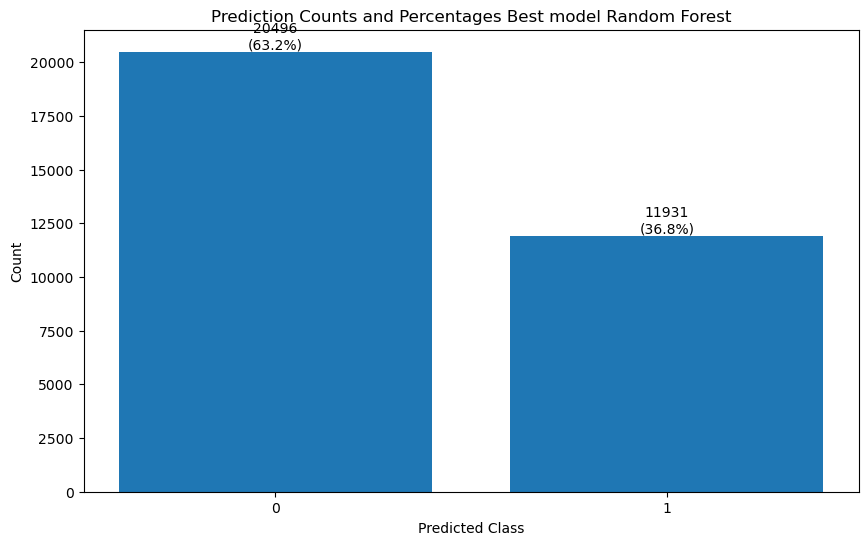

In [179]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Count the occurrences of each class
prediction_counts = predictions_df["prediction"].value_counts().sort_index()

# Calculate total and percentage for each prediction class
total_predictions = len(predictions_df)
prediction_summary = prediction_counts.to_frame("Count")
prediction_summary["Percentage"] = (prediction_summary["Count"] / total_predictions) * 100

# Plot a bar chart with totals and percentages
plt.figure(figsize=(10, 6))
bars = plt.bar(prediction_summary.index, prediction_summary["Count"], tick_label=prediction_summary.index)

# Annotate the bars with count and percentage
for bar, count, percentage in zip(bars, prediction_summary["Count"], prediction_summary["Percentage"]):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{int(count)}\n({percentage:.1f}%)",
        ha='center',
        va='bottom'
    )

plt.title("Prediction Counts and Percentages for Best model Random Forest")
plt.xlabel("Predicted Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

Finally we save the predictions in a csv-file.

In [180]:
# Import necessary libraries
import pandas as pd

predictions_df.to_csv('test_predictions.csv', index=False)

File saved as 'test_predictions.csv' in the current directory.
